## Load the Data

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline 
sns.set_palette("deep")
pd.pandas.set_option('display.max_columns',None)

#Supress warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
housedf = pd.read_csv('innercity.csv')
housedf.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3876100940,20150427T000000,600000,4.0,1.75,3050.0,9440.0,1,0,0.0,3,8.0,1800.0,1250.0,1966,0,98034,47.7228,-122.183,2020.0,8660.0,0.0,12490
1,3145600250,20150317T000000,190000,2.0,1.00,670.0,3101.0,1,0,0.0,4,6.0,670.0,0.0,1948,0,98118,47.5546,-122.274,1660.0,4100.0,0.0,3771
2,7129303070,20140820T000000,735000,4.0,2.75,3040.0,2415.0,2,1,4.0,3,8.0,3040.0,0.0,1966,0,98118,47.5188,-122.256,2620.0,2433.0,0.0,5455
3,7338220280,20141010T000000,257000,3.0,2.50,1740.0,3721.0,2,0,0.0,3,8.0,1740.0,0.0,2009,0,98002,47.3363,-122.213,2030.0,3794.0,0.0,5461
4,7950300670,20150218T000000,450000,2.0,1.00,1120.0,4590.0,1,0,0.0,3,7.0,1120.0,0.0,1924,0,98118,47.5663,-122.285,1120.0,5100.0,0.0,5710


1. cid: a notation for a house
2. dayhours: Date house was sold
3. price: Price is prediction target
4. room_bed: Number of Bedrooms/House
5. room_bath: Number of bathrooms/bedrooms
6. living_measure: square footage of the home
7. lot_measure: square footage of the lot
8. ceil: Total floors (levels) in house
9. coast: House which has a view to a waterfront
10. sight: Has been viewed
11. condition: How good the condition is (Overall)
12. quality: grade given to the housing unit, based on grading system
13. ceil_measure: square footage of house apart from basement
14. basement_measure: square footage of the basement
15. yr_built: Built Year
16. yr_renovated: Year when house was renovated
17. zipcode: zip
18. lat: Latitude coordinate
19. long: Longitude coordinate
20. living_measure15: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area
21. lot_measure15: lotSize area in 2015(implies-- some renovations)
22. furnished: Based on the quality of room
23. total_area: Measure of both living and lot

In [3]:
housedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  object 
 8   coast             21612 non-null  object 
 9   sight             21556 non-null  float64
 10  condition         21556 non-null  object 
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  object 
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

## Cleaning of Data

In [4]:
# Cehcking for Duplicates

dup = housedf[housedf.duplicated()]

dup

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area


We can see from above that there are certain variables that are showing up as object data type even though the data in them is of numeric types. These variables are:
1. ceil
2. coast
3. condition
4. yr_built
5. long
6. total_area

In [5]:
col = ['room_bed','ceil','coast','condition','yr_built','long','total_area']
for i in col:
    print(i.upper())
    print(housedf[i].unique())

ROOM_BED
[ 4.  2.  3.  1.  5.  6. nan  7. 10.  8.  0.  9. 33. 11.]
CEIL
['1' '2' '3' '1.5' '2.5' '$' nan '3.5']
COAST
['0' '1' '$' nan]
CONDITION
['3' '4' '5' '2' nan '1' '$']
YR_BUILT
['1966' '1948' '2009' '1924' '1994' '2005' '1978' '1983' '2012' '1912'
 '1990' '1967' '1919' '1908' '1950' '2000' '2013' '1943' '1922' '1977'
 '2004' '1935' '1964' '1945' '1987' '2008' '1940' '2003' '1988' '1985'
 '1998' '1995' '1946' '1984' '1958' '1963' '1942' '2014' '1971' '1936'
 '1954' '1923' '2002' '1972' '2007' '1930' '1962' '1999' '1953' '1965'
 '2010' '1997' '2006' '1979' '1996' '1992' '1968' '1980' '1981' '1969'
 '2001' '1929' '1952' '1916' '1976' '1974' '1920' '1931' '1975' '1960'
 '1900' '$' '1986' '1989' '1906' '1955' '1956' '1915' '1941' '1993' '2011'
 '1925' '1947' '1991' '1926' '1927' '1951' '1961' '1932' '1917' '1928'
 '1959' '1921' '1911' '1949' '1982' '1913' '1957' '1914' '1938' '1973'
 '1937' '1944' '1970' '1901' '1907' '1939' '1918' '1934' '1904' '2015'
 '1909' '1910' '1905' '1902' '

In [6]:
housedf.replace('$',np.nan,inplace=True)

In [7]:
housedf['ceil'].unique()

array(['1', '2', '3', '1.5', '2.5', nan, '3.5'], dtype=object)

In [8]:
housedf.dtypes

cid                   int64
dayhours             object
price                 int64
room_bed            float64
room_bath           float64
living_measure      float64
lot_measure         float64
ceil                 object
coast                object
sight               float64
condition            object
quality             float64
ceil_measure        float64
basement            float64
yr_built             object
yr_renovated          int64
zipcode               int64
lat                 float64
long                 object
living_measure15    float64
lot_measure15       float64
furnished           float64
total_area           object
dtype: object

In [9]:
# Converting the relevant variables back into numeric form 
for i in col:
    housedf[i] = housedf[i].astype('float64')

In [10]:
housedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21541 non-null  float64
 8   coast             21582 non-null  float64
 9   sight             21556 non-null  float64
 10  condition         21528 non-null  float64
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21598 non-null  float64
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [11]:
housedf.isnull().sum().sort_values(ascending = False)

living_measure15    166
room_bed            108
room_bath           108
condition            85
ceil                 72
total_area           68
sight                57
lot_measure          42
long                 34
coast                31
furnished            29
lot_measure15        29
living_measure       17
yr_built             15
quality               1
basement              1
ceil_measure          1
yr_renovated          0
zipcode               0
lat                   0
dayhours              0
price                 0
cid                   0
dtype: int64

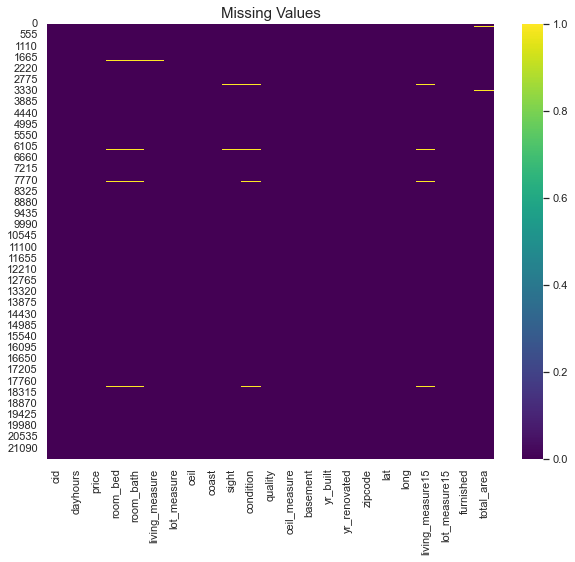

In [12]:
plt.subplots(figsize=(10,8))
sns.heatmap(housedf.isnull(), cmap='viridis')
plt.title('Missing Values', fontsize=15)
plt.show()

In [13]:
# Checking the number of rows that will get dropped if we drop the missing values

print('Number of rows to be dropped: {}'.format(housedf.shape[0]-housedf.dropna().shape[0]))
print('Percentage of rows to be dropped: {:.2f}%'.format((housedf.shape[0]-housedf.dropna().shape[0])*100/housedf.shape[0]))

Number of rows to be dropped: 325
Percentage of rows to be dropped: 1.50%


In [14]:
housedf.dropna(inplace=True)

In [15]:
housedf.shape

(21288, 23)

In [16]:
housedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21288 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21288 non-null  int64  
 1   dayhours          21288 non-null  object 
 2   price             21288 non-null  int64  
 3   room_bed          21288 non-null  float64
 4   room_bath         21288 non-null  float64
 5   living_measure    21288 non-null  float64
 6   lot_measure       21288 non-null  float64
 7   ceil              21288 non-null  float64
 8   coast             21288 non-null  float64
 9   sight             21288 non-null  float64
 10  condition         21288 non-null  float64
 11  quality           21288 non-null  float64
 12  ceil_measure      21288 non-null  float64
 13  basement          21288 non-null  float64
 14  yr_built          21288 non-null  float64
 15  yr_renovated      21288 non-null  int64  
 16  zipcode           21288 non-null  int64 

In [17]:
housedf.describe().T

,count,mean,std,min,25%,50%,75%,max
cid,21288.0,4.577499e+09,2.876915e+09,1.000102e+06,2.122049e+09,3.904921e+09,7.305300e+09,9.900000e+09
price,21288.0,5.399826e+05,3.656028e+05,7.500000e+04,3.210202e+05,4.500000e+05,6.450000e+05,7.700000e+06
room_bed,21288.0,3.370678e+00,9.301225e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
room_bath,21288.0,2.114395e+00,7.686656e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
living_measure,21288.0,2.080089e+03,9.176964e+02,2.900000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
lot_measure,21288.0,1.510815e+04,4.142870e+04,5.200000e+02,5.040000e+03,7.620000e+03,1.068250e+04,1.651359e+06
ceil,21288.0,1.494927e+00,5.404853e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
coast,21288.0,7.468997e-03,8.610203e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
sight,21288.0,2.342165e-01,7.658749e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21288.0,3.409245e+00,6.505383e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


## Feature Engineering

In [18]:
House_price = housedf.copy()

In [19]:
#Lets extract year in which house was sold and convert its type to numeric and remove dayhours as it no longer needed
#as required information is extracted from this column.

House_price['yr_sold'] = House_price['dayhours'].str.slice(stop=4).astype('int64')

In [20]:
House_price['basement'] = House_price['basement'].apply(lambda x: 0 if x==0 else 1)
House_price['renovated'] = House_price['yr_renovated'].apply(lambda x: 0 if x==0 else 1)

In [21]:
# calculating the age of buliding

A = House_price[House_price['yr_renovated'] == 0].copy()
B = House_price[House_price['yr_renovated'] != 0].copy()

A['building_age'] = A['yr_sold'] - A['yr_built']
B['building_age'] = B['yr_sold'] - B['yr_renovated']
House_price = pd.concat([A, B], axis=0)

In [22]:
House_price.head(2)

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,yr_sold,renovated,building_age
0,3876100940,20150427T000000,600000,4.0,1.75,3050.0,9440.0,1.0,0.0,0.0,3.0,8.0,1800.0,1,1966.0,0,98034,47.7228,-122.183,2020.0,8660.0,0.0,12490.0,2015,0,49.0
1,3145600250,20150317T000000,190000,2.0,1.00,670.0,3101.0,1.0,0.0,0.0,4.0,6.0,670.0,0,1948.0,0,98118,47.5546,-122.274,1660.0,4100.0,0.0,3771.0,2015,0,67.0


In [23]:
A = House_price[House_price['yr_sold']==2014].copy()
A.drop(['living_measure15','lot_measure15'],axis=1,inplace=True)

A.shape

(14411, 24)

In [24]:
A.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,furnished,total_area,yr_sold,renovated,building_age
2,7129303070,20140820T000000,735000,4.0,2.75,3040.0,2415.0,2.0,1.0,4.0,3.0,8.0,3040.0,0,1966.0,0,98118,47.5188,-122.256,0.0,5455.0,2014,0,48.0
3,7338220280,20141010T000000,257000,3.0,2.50,1740.0,3721.0,2.0,0.0,0.0,3.0,8.0,1740.0,0,2009.0,0,98002,47.3363,-122.213,0.0,5461.0,2014,0,5.0
6,510002519,20140715T000000,466000,2.0,1.50,1140.0,1058.0,3.0,0.0,0.0,3.0,7.0,1140.0,0,2005.0,0,98103,47.6608,-122.333,0.0,2198.0,2014,0,9.0
7,1624059224,20140618T000000,1160000,4.0,3.50,4680.0,9700.0,2.0,0.0,0.0,3.0,10.0,3360.0,1,2005.0,0,98006,47.5703,-122.165,1.0,14380.0,2014,0,9.0
8,5469503280,20140721T000000,449950,4.0,2.50,3100.0,10000.0,2.0,0.0,0.0,3.0,9.0,3100.0,0,1978.0,0,98042,47.3741,-122.150,1.0,13100.0,2014,0,36.0


In [25]:
B = House_price[House_price['yr_sold']!=2014].copy()
B['total_area'] = B['living_measure15']+B['lot_measure15']
B['ceil_measure_perc'] = B['ceil_measure']/B['living_measure']
B['basement_perc'] = B['basement']/B['living_measure']
B['ceil_measure'] = B['ceil_measure_perc']*B['living_measure15']
B['basement'] = B['basement_perc']*B['living_measure15']
B['living_measure'] = B['living_measure15']
B['lot_measure'] = B['lot_measure15']
B.drop(['lot_measure15','living_measure15','ceil_measure_perc', 'basement_perc'],axis=1,inplace=True)
B.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,furnished,total_area,yr_sold,renovated,building_age
0,3876100940,20150427T000000,600000,4.0,1.75,2020.0,8660.0,1.0,0.0,0.0,3.0,8.0,1192.131148,0.662295,1966.0,0,98034,47.7228,-122.183,0.0,10680.0,2015,0,49.0
1,3145600250,20150317T000000,190000,2.0,1.00,1660.0,4100.0,1.0,0.0,0.0,4.0,6.0,1660.000000,0.000000,1948.0,0,98118,47.5546,-122.274,0.0,5760.0,2015,0,67.0
4,7950300670,20150218T000000,450000,2.0,1.00,1120.0,5100.0,1.0,0.0,0.0,3.0,7.0,1120.000000,0.000000,1924.0,0,98118,47.5663,-122.285,0.0,6220.0,2015,0,91.0
11,809001070,20150123T000000,550000,3.0,1.00,1880.0,3600.0,1.5,0.0,0.0,3.0,8.0,1880.000000,0.000000,1912.0,0,98109,47.6347,-122.352,0.0,5480.0,2015,0,103.0
13,1311800130,20150123T000000,162500,3.0,1.50,1390.0,7665.0,1.0,0.0,0.0,3.0,7.0,1390.000000,0.000000,1967.0,0,98001,47.3369,-122.275,0.0,9055.0,2015,0,48.0


In [26]:
B.shape

(6877, 24)

In [27]:
House_price = pd.concat([A,B],axis=0)

In [28]:
#As cid is a notation for a house, we don't need to feed it to our model, so along with dayhours, cid also need to be 
#removed from our dataset.

House_price.drop(['dayhours','cid'], axis=1, inplace=True)
House_price.head()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,furnished,total_area,yr_sold,renovated,building_age
2,735000,4.0,2.75,3040.0,2415.0,2.0,1.0,4.0,3.0,8.0,3040.0,0.0,1966.0,0,98118,47.5188,-122.256,0.0,5455.0,2014,0,48.0
3,257000,3.0,2.50,1740.0,3721.0,2.0,0.0,0.0,3.0,8.0,1740.0,0.0,2009.0,0,98002,47.3363,-122.213,0.0,5461.0,2014,0,5.0
6,466000,2.0,1.50,1140.0,1058.0,3.0,0.0,0.0,3.0,7.0,1140.0,0.0,2005.0,0,98103,47.6608,-122.333,0.0,2198.0,2014,0,9.0
7,1160000,4.0,3.50,4680.0,9700.0,2.0,0.0,0.0,3.0,10.0,3360.0,1.0,2005.0,0,98006,47.5703,-122.165,1.0,14380.0,2014,0,9.0
8,449950,4.0,2.50,3100.0,10000.0,2.0,0.0,0.0,3.0,9.0,3100.0,0.0,1978.0,0,98042,47.3741,-122.150,1.0,13100.0,2014,0,36.0


In [29]:
House_price.shape

(21288, 22)

## Exploratory Data Analysis

### Univariate Analysis

Text(0.5, 0.98, 'Price Variable Anaylsis')

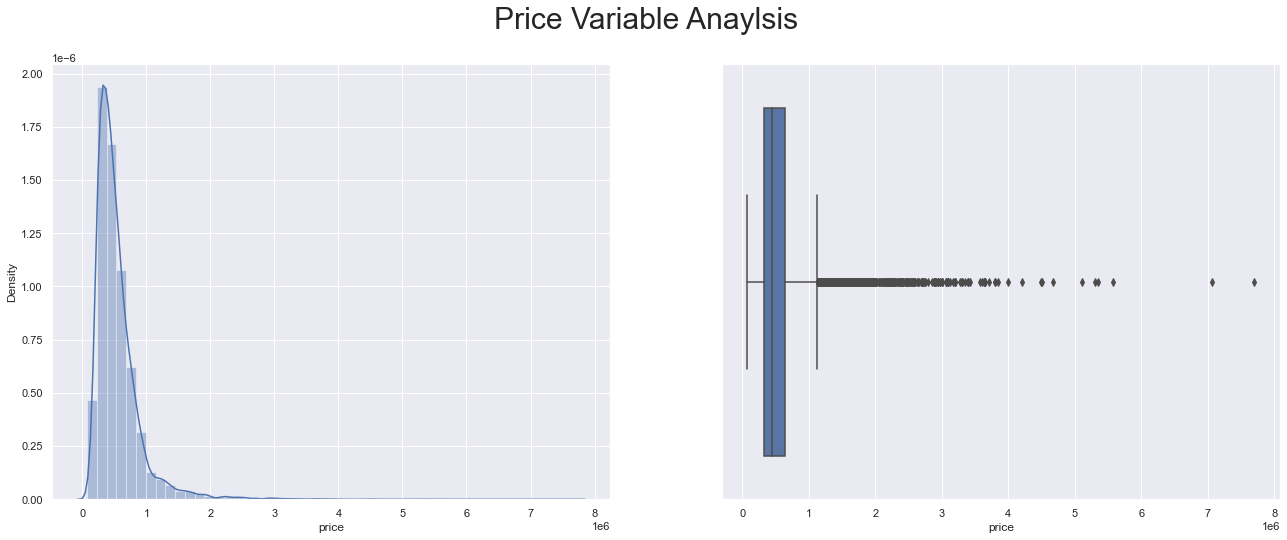

In [30]:
fig_dims = (22, 8)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=fig_dims)
sns.distplot(House_price['price'], ax=ax[0]);
sns.boxplot(House_price['price'],  orient='h', ax=ax[1]);
fig.suptitle("Price Variable Anaylsis", size=30)

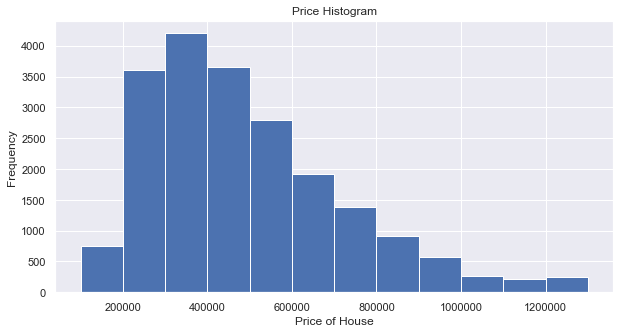

In [31]:
plt.figure(figsize = (10,5))
bins = np.array([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300]) * 1000
plt.hist(x=House_price['price'], bins=bins)
plt.xlabel('Price of House')
plt.ticklabel_format(style='plain')
plt.ylabel('Frequency')
plt.title('Price Histogram')
plt.show()

In [32]:
#Let's look at the distribution of price at different percentiles
print("0.5% properties have a price lower than {0: .2f}".format(np.percentile(House_price["price"], 0.5)))
print("  1% properties have a price lower than {0: .2f}".format(np.percentile(House_price["price"], 1)))
print("  5% properties have a price lower than {0: .2f}".format(np.percentile(House_price["price"], 5)))
print(" 10% properties have a price lower than {0: .2f}".format(np.percentile(House_price["price"], 10)))
print(" 90% properties have a price lower than {0: .2f}".format(np.percentile(House_price["price"], 90)))
print(" 95% properties have a price lower than {0: .2f}".format(np.percentile(House_price["price"], 95)))
print(" 99% properties have a price lower than {0: .2f}".format(np.percentile(House_price["price"], 99)))
print("99.5% properties have a price lower than {0: .2f}".format(np.percentile(House_price["price"], 99.5)))

0.5% properties have a price lower than  134435.00
  1% properties have a price lower than  153935.39
  5% properties have a price lower than  210000.00
 10% properties have a price lower than  245000.00
 90% properties have a price lower than  887325.00
 95% properties have a price lower than  1160000.00
 99% properties have a price lower than  1970000.00
99.5% properties have a price lower than  2455650.00


In [33]:
House_price['room_bed'].value_counts()

3.0     9672
4.0     6783
2.0     2720
5.0     1577
6.0      266
1.0      196
7.0       38
0.0       13
8.0       12
9.0        6
10.0       3
33.0       1
11.0       1
Name: room_bed, dtype: int64

Text(0.5, 1.0, 'Bedroom Analysis')

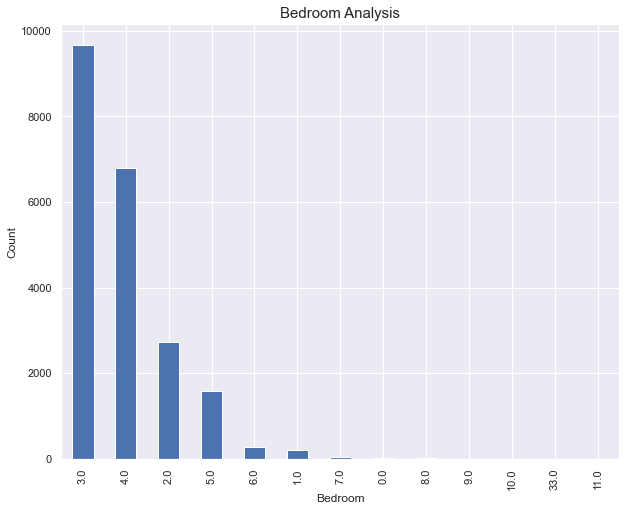

In [34]:
plt.figure(figsize=(10,8))
House_price['room_bed'].value_counts().plot(kind='bar')
plt.title('number of Bedroom')
plt.xlabel('Bedroom')
plt.ylabel('Count')
plt.title("Bedroom Analysis", size=15)

Text(0.5, 1.0, 'Bathroom Analysis')

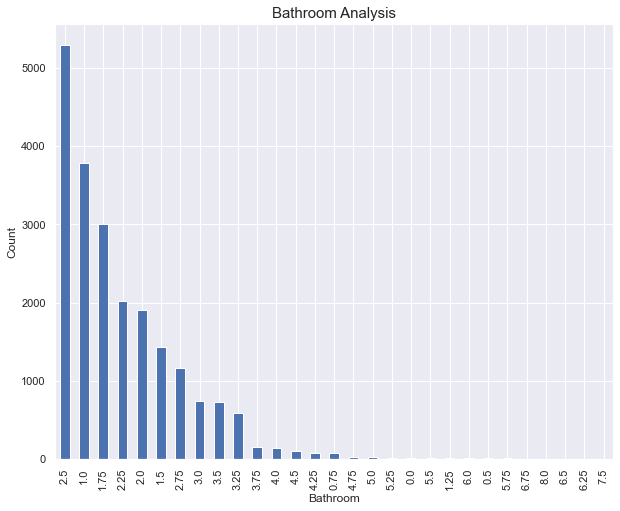

In [35]:
plt.figure(figsize=(10,8))
House_price['room_bath'].value_counts().plot(kind='bar')
plt.title('number of Bathroom')
plt.xlabel('Bathroom')
plt.ylabel('Count')
plt.title("Bathroom Analysis", size=15)

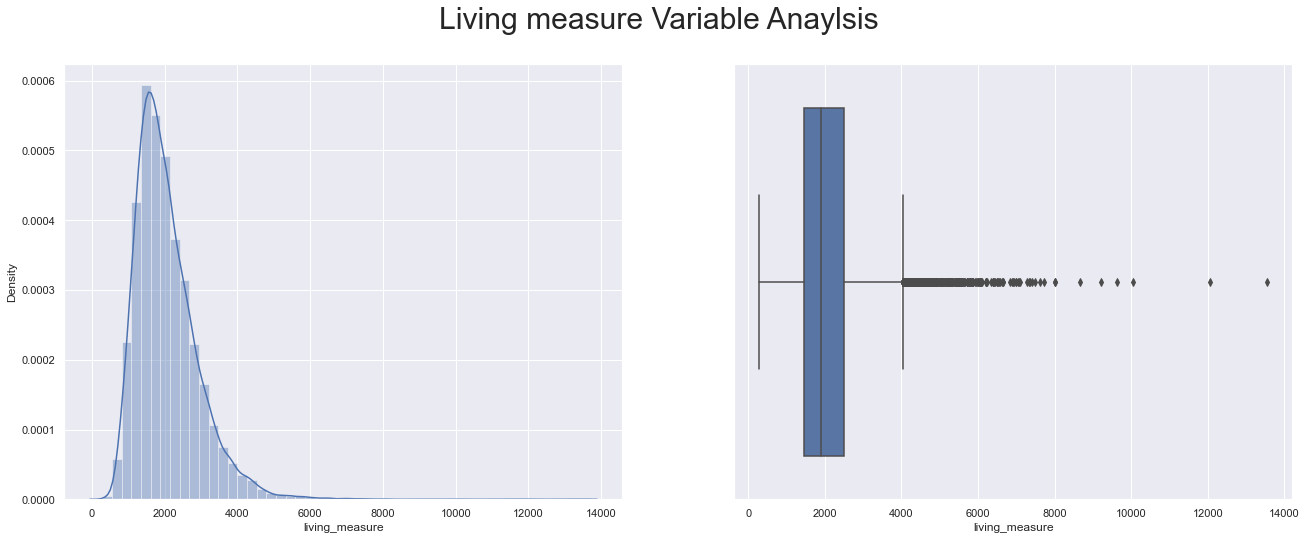

In [36]:
fig_dims = (22, 8)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=fig_dims)
sns.distplot(House_price['living_measure'], ax=ax[0])
sns.boxplot(House_price['living_measure'],  orient='h', ax=ax[1])
fig.suptitle("Living measure Variable Anaylsis", size=30);

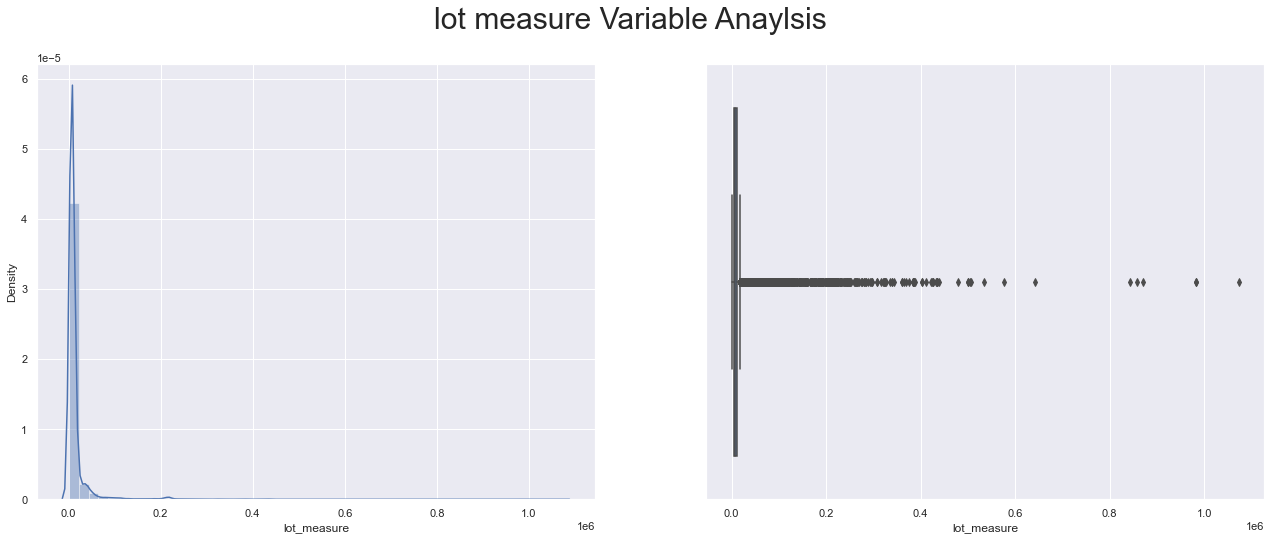

In [37]:
fig_dims = (22, 8)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=fig_dims)
sns.distplot(House_price['lot_measure'], ax=ax[0])
sns.boxplot(House_price['lot_measure'],  orient='h', ax=ax[1])
fig.suptitle("lot measure Variable Anaylsis", size=30);

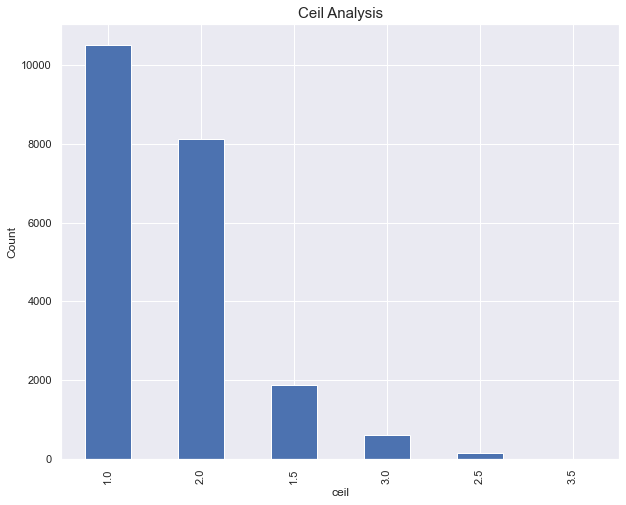

In [38]:
plt.figure(figsize=(10,8))
House_price['ceil'].value_counts().plot(kind='bar')
plt.title('ceil')
plt.xlabel('ceil')
plt.ylabel('Count')
plt.title("Ceil Analysis", size=15);

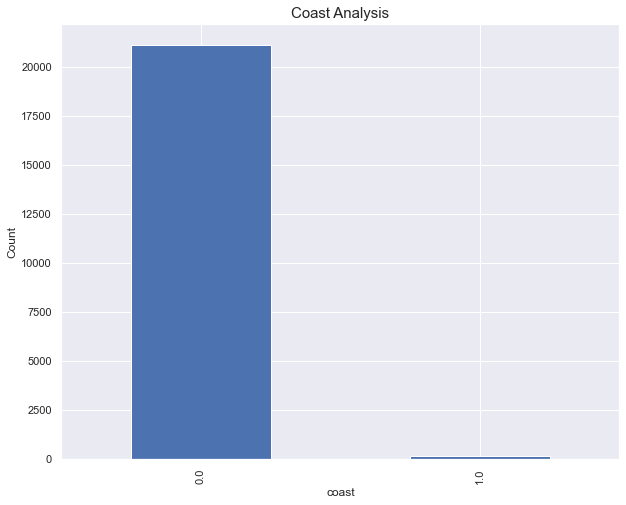

In [39]:
plt.figure(figsize=(10,8))
House_price['coast'].value_counts().plot(kind='bar')
plt.title('coast')
plt.xlabel('coast')
plt.ylabel('Count')
plt.title("Coast Analysis", size=15);

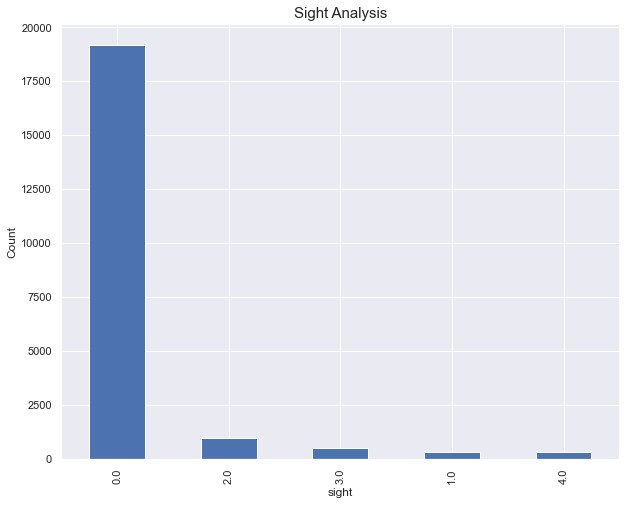

In [40]:
plt.figure(figsize=(10,8))
House_price['sight'].value_counts().plot(kind='bar')
plt.title('sight')
plt.xlabel('sight')
plt.ylabel('Count')
plt.title("Sight Analysis", size=15);

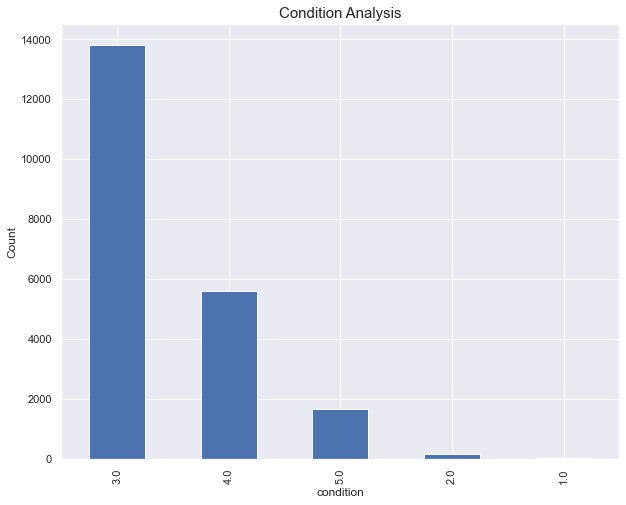

In [41]:
plt.figure(figsize=(10,8))
House_price['condition'].value_counts().plot(kind='bar')
plt.title('condition')
plt.xlabel('condition')
plt.ylabel('Count')
plt.title("Condition Analysis", size=15);

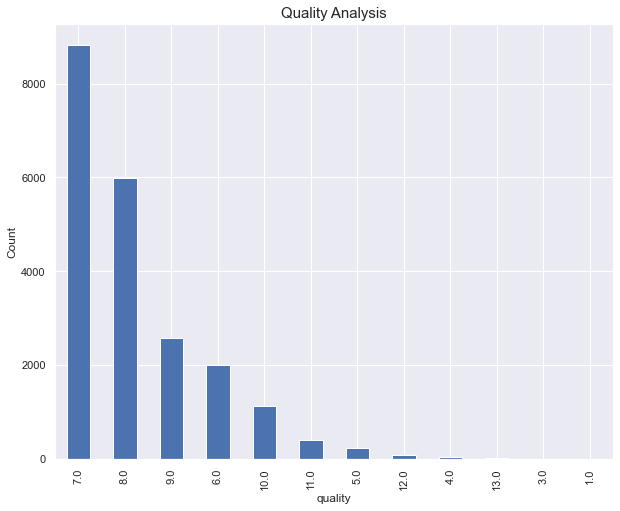

In [42]:
plt.figure(figsize=(10,8))
House_price['quality'].value_counts().plot(kind='bar')
plt.title('quality')
plt.xlabel('quality')
plt.ylabel('Count')
plt.title("Quality Analysis", size=15);

In [43]:
#checking the no. of data points with quality rating as 13
House_price[House_price['quality']>10]

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,furnished,total_area,yr_sold,renovated,building_age
88,1380000,5.0,4.00,3760.0,22763.0,1.0,0.0,3.0,4.0,11.0,1910.000000,1.000000,1969.0,0,98040,47.5333,-122.220,1.0,26523.0,2014,0,45.0
125,971971,4.0,3.75,3460.0,6738.0,2.0,0.0,0.0,3.0,11.0,3460.000000,0.000000,2013.0,0,98059,47.5060,-122.145,1.0,10198.0,2014,0,1.0
134,1230000,4.0,2.50,3180.0,10319.0,2.0,0.0,0.0,4.0,11.0,3180.000000,0.000000,1986.0,0,98040,47.5372,-122.232,1.0,13499.0,2014,0,28.0
178,1140000,5.0,4.00,7320.0,217800.0,2.0,0.0,0.0,3.0,11.0,7320.000000,0.000000,1992.0,0,98058,47.4473,-122.086,1.0,225120.0,2014,0,22.0
184,1600000,6.0,5.00,6050.0,230652.0,2.0,0.0,3.0,3.0,11.0,6050.000000,0.000000,2001.0,0,98024,47.6033,-121.943,1.0,236702.0,2014,0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9931,3400000,4.0,4.00,4260.0,10408.0,2.0,0.0,0.0,3.0,11.0,3280.000000,1.000000,1939.0,2010,98112,47.6380,-122.288,1.0,14668.0,2015,1,5.0
14843,2900000,4.0,3.25,3890.0,20060.0,1.5,0.0,2.0,3.0,11.0,3658.910891,0.770297,1982.0,2008,98004,47.6312,-122.223,1.0,23950.0,2015,1,7.0
15616,1600000,4.0,4.50,2660.0,6000.0,2.0,0.0,4.0,4.0,11.0,1949.259259,0.703704,1910.0,1977,98116,47.5922,-122.388,1.0,8660.0,2015,1,38.0
18197,2650000,4.0,3.50,3210.0,15306.0,2.0,0.0,3.0,3.0,11.0,2390.425532,0.682979,1958.0,1995,98033,47.6899,-122.217,1.0,18516.0,2015,1,20.0


**There are only 494 properties which have the highest quality rating Greater than 10**

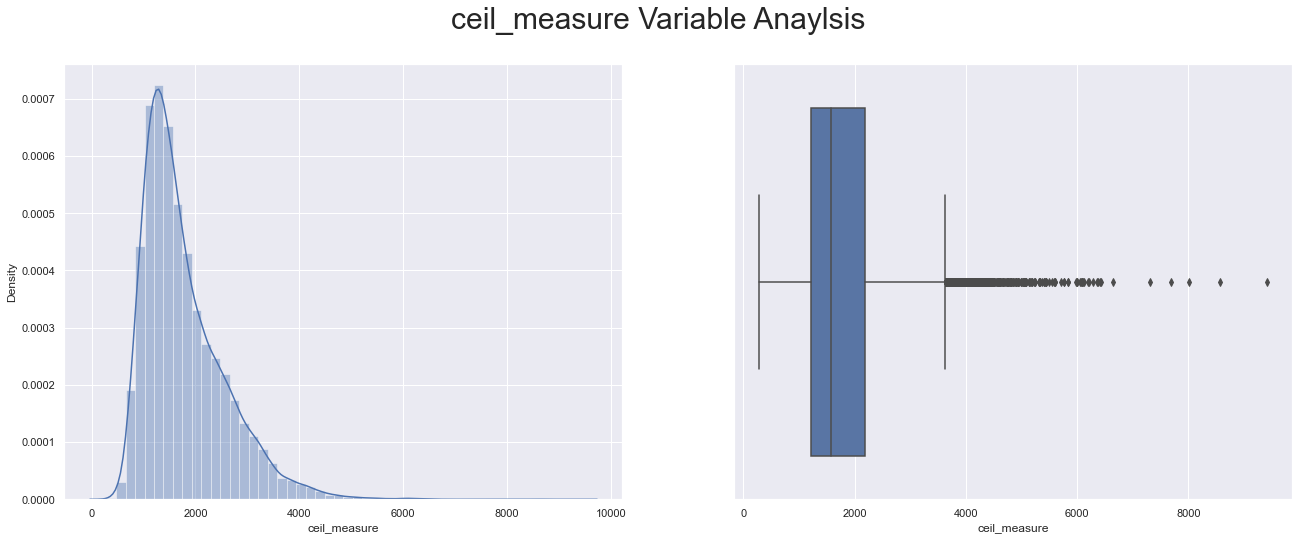

In [44]:
fig_dims = (22, 8)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=fig_dims)
sns.distplot(House_price['ceil_measure'], ax=ax[0])
sns.boxplot(House_price['ceil_measure'],  orient='h', ax=ax[1])
fig.suptitle("ceil_measure Variable Anaylsis", size=30);

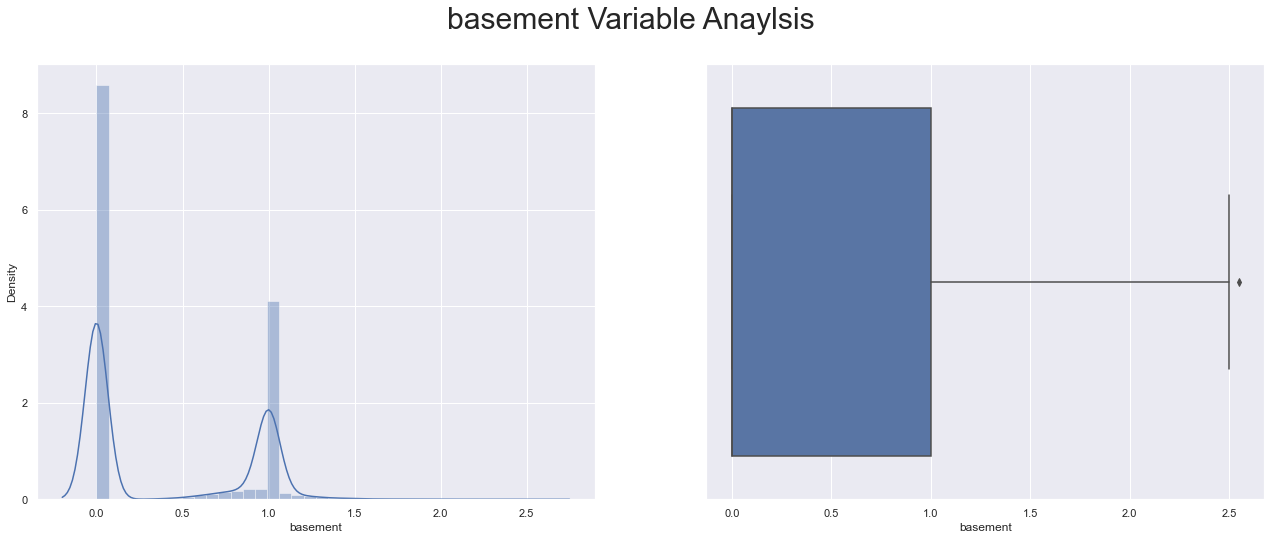

In [45]:
fig_dims = (22, 8)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=fig_dims)
sns.distplot(House_price['basement'], ax=ax[0])
sns.boxplot(House_price['basement'],  orient='h', ax=ax[1])
fig.suptitle("basement Variable Anaylsis", size=30);

In [46]:
House_price[House_price.basement==0].shape

# No basements for 12945 properties

(12945, 22)

In [47]:
House_price[House_price.basement>0].shape

(8343, 22)

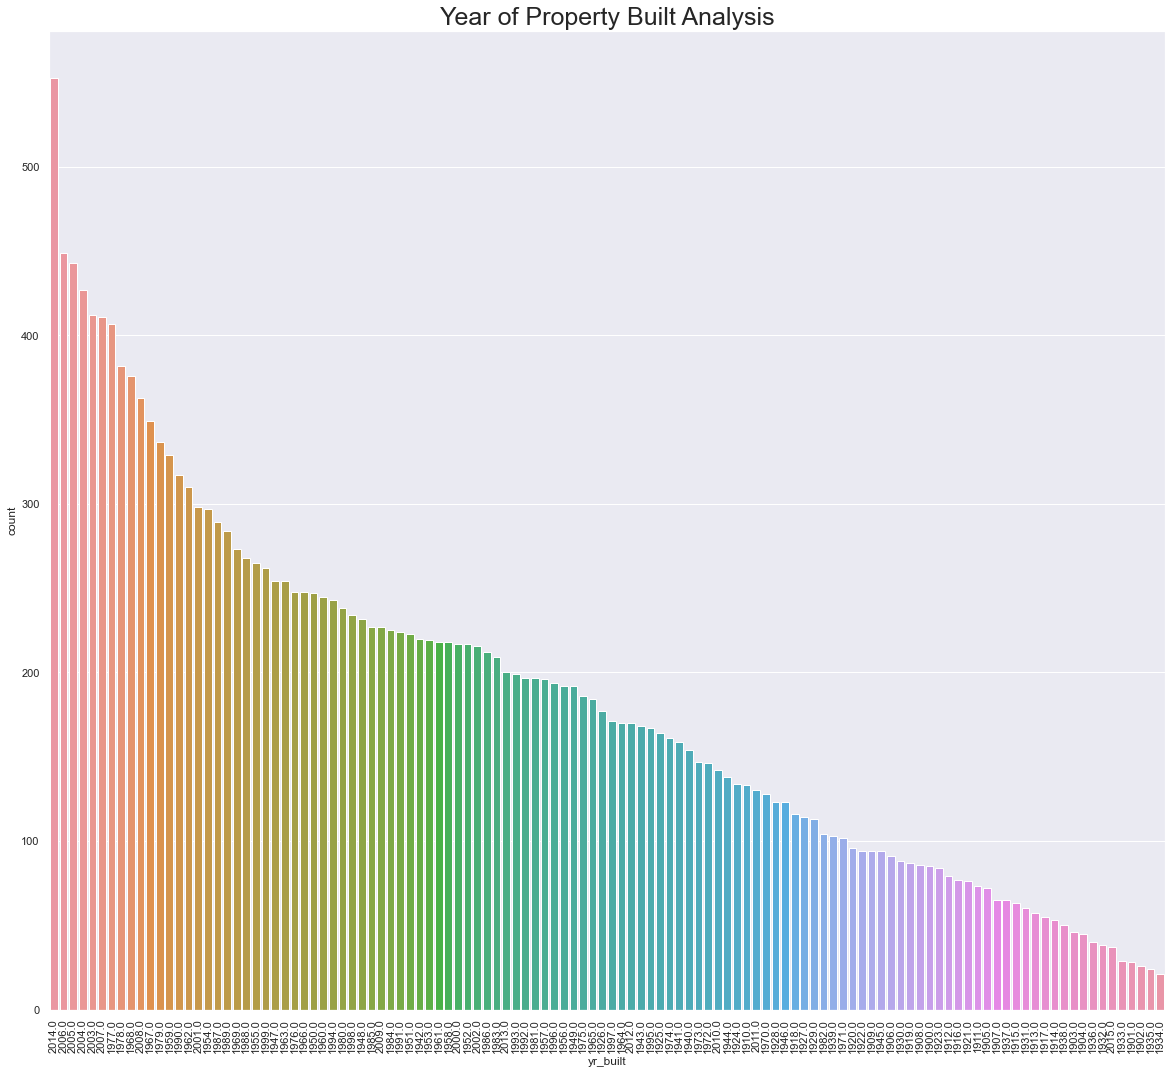

In [48]:
fig,axes = plt.subplots(figsize=(20,18))
sns.countplot(House_price['yr_built'],order = House_price['yr_built'].value_counts().index)
axes.set_xticklabels(House_price['yr_built'].value_counts().index,rotation=90)
plt.title("Year of Property Built Analysis", size=25)
plt.show()

In [49]:
House_price[House_price['yr_renovated']>0].shape

#893 houses were renoavted

(893, 22)

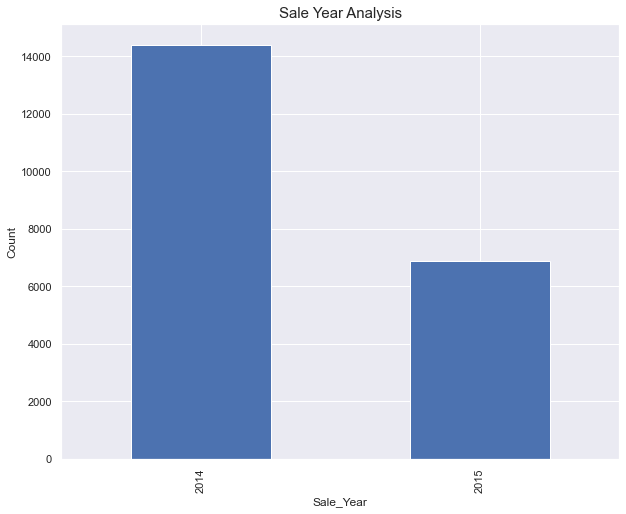

In [50]:
plt.figure(figsize=(10,8))
House_price['yr_sold'].value_counts().plot(kind='bar')
plt.title('Sale_Year')
plt.xlabel('Sale_Year')
plt.ylabel('Count')
plt.title("Sale Year Analysis", size=15);

Text(0.5, 0.98, 'Building Age Variable Anaylsis')

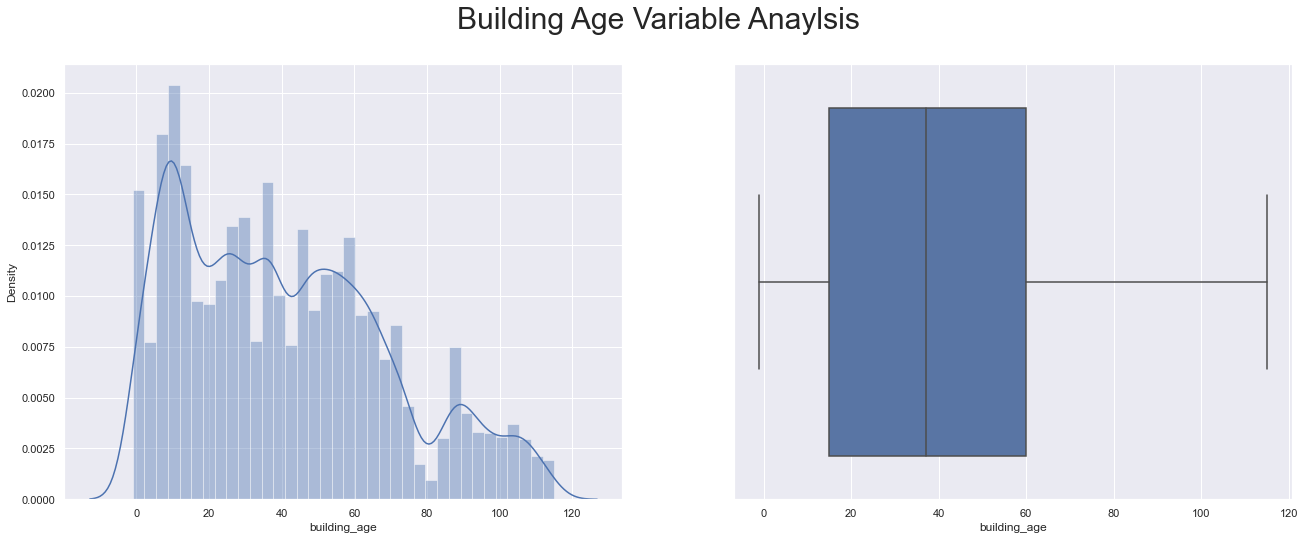

In [51]:
fig_dims = (22, 8)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=fig_dims)
sns.distplot(House_price['building_age'], ax=ax[0])
sns.boxplot(House_price['building_age'],  orient='h', ax=ax[1])
fig.suptitle("Building Age Variable Anaylsis", size=30)

### Bivariate Anaalysis

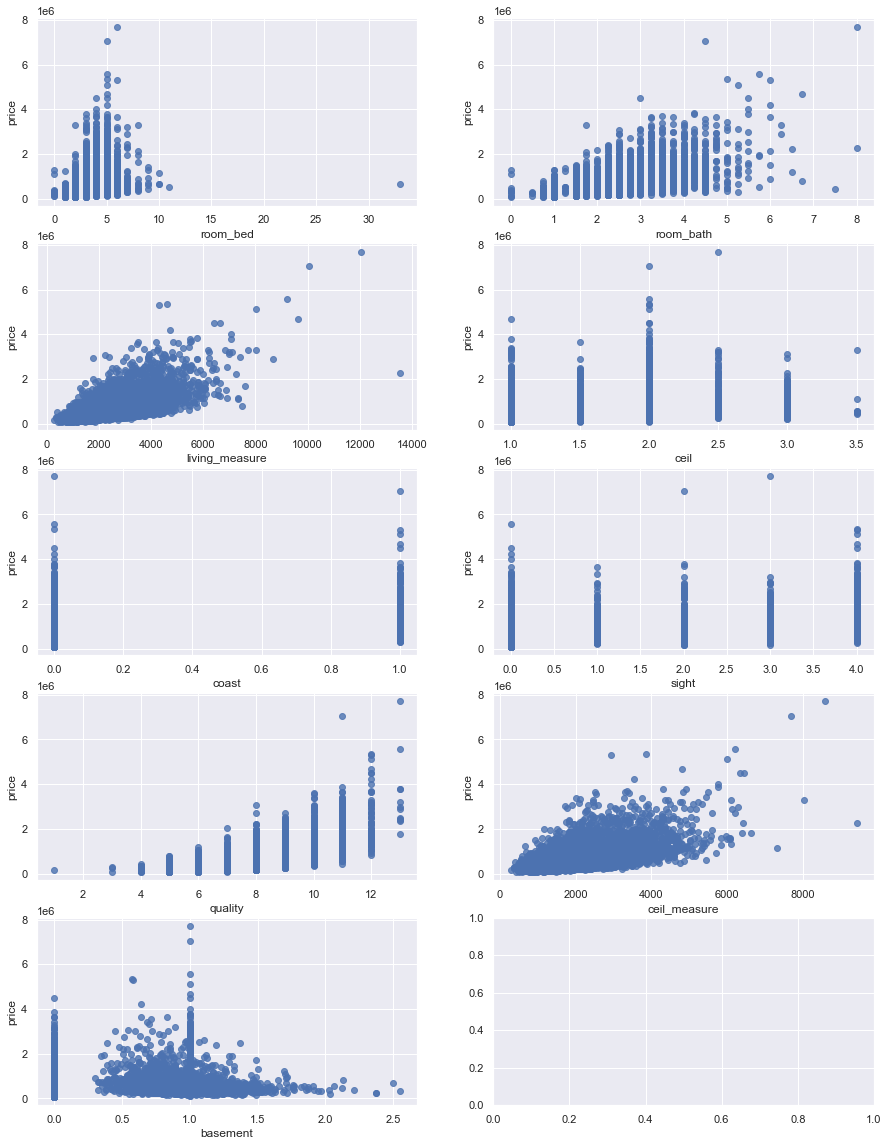

In [52]:
#Bivariate analysis to gain data insights here, using regplot

f,axes = plt.subplots(5, 2,figsize=(15,20))
sns.regplot(x='room_bed', y='price', data=House_price,  ax=axes[0][0],fit_reg=False);
sns.regplot(x='room_bath', y='price', data=House_price,  ax=axes[0][1], fit_reg=False);
sns.regplot(x='living_measure', y='price', data=House_price,  ax=axes[1][0],fit_reg=False);
sns.regplot(x='ceil', y='price', data=House_price,  ax=axes[1][1], fit_reg=False);
sns.regplot(x='coast', y='price', data=House_price,  ax=axes[2][0],fit_reg=False);
sns.regplot(x='sight', y='price', data=House_price,  ax=axes[2][1], fit_reg=False);
sns.regplot(x='quality', y='price', data=House_price,  ax=axes[3][0],fit_reg=False);
sns.regplot(x='ceil_measure', y='price', data=House_price,  ax=axes[3][1], fit_reg=False);
sns.regplot(x='basement', y='price', data=House_price,  ax=axes[4][0],fit_reg=False);

1. Price vs coast, price vs sight and price vs ceil do not seem to have any linear relationship either positive or negative.
2. Price vs living measure, Price vs ceil_measure, seems to have a positive linear relationship with outliers present.

### Multivariate Analysis

AxesSubplot(0.125,0.125;0.775x0.755)


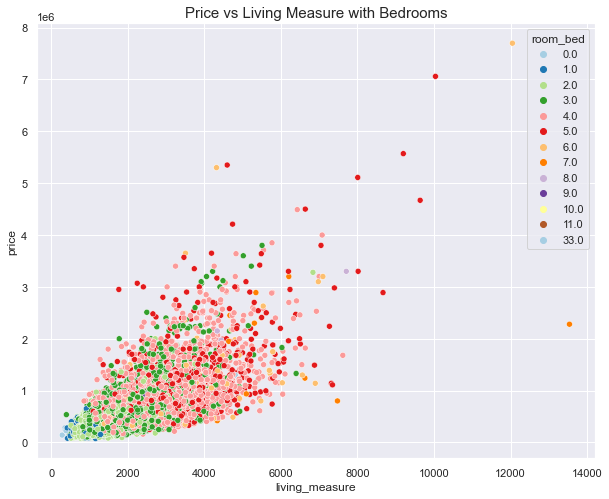

In [53]:
plt.figure(figsize=(10, 8))
print(
    sns.scatterplot(House_price['living_measure'],
                    House_price['price'],
                    hue=House_price['room_bed'],
                    palette='Paired',
                    legend='full'));
plt.title("Price vs Living Measure with Bedrooms", size=15);

AxesSubplot(0.125,0.125;0.775x0.755)


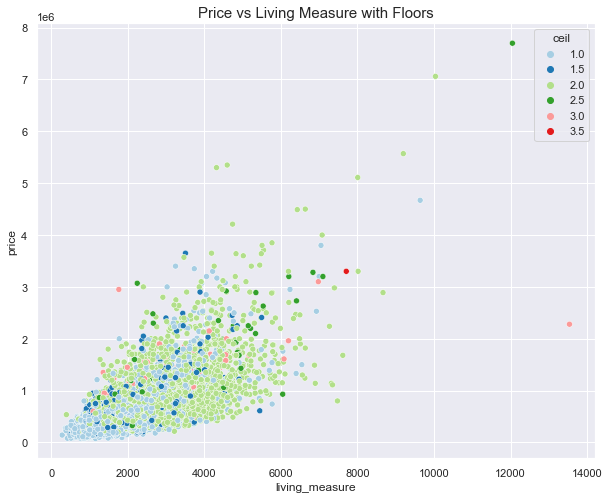

In [54]:
plt.figure(figsize=(10, 8))
print(sns.scatterplot(House_price['living_measure'],House_price['price'],hue=House_price['ceil'],palette='Paired',legend='full'))
plt.title("Price vs Living Measure with Floors", size=15);

AxesSubplot(0.125,0.125;0.775x0.755)


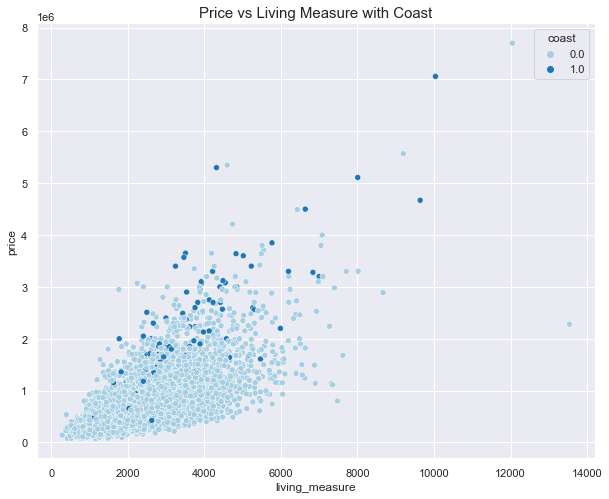

In [55]:
plt.figure(figsize=(10, 8))
print(sns.scatterplot(House_price['living_measure'],House_price['price'],hue=House_price['coast'],palette='Paired',legend='full'))
plt.title("Price vs Living Measure with Coast", size=15);

AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 1.0, 'Price vs Living Measure with Sight')

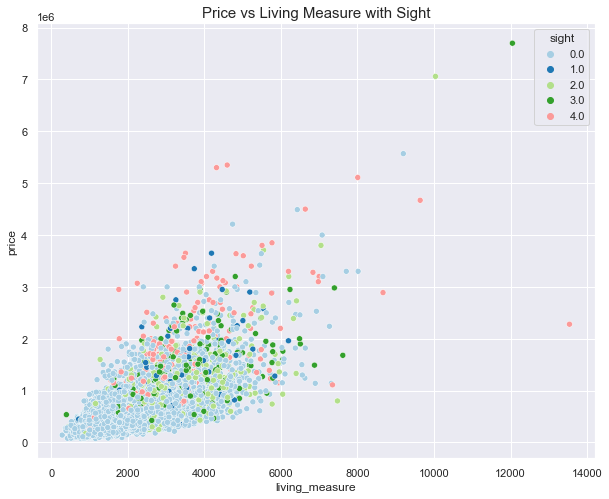

In [56]:
#Sight - Viewed in relation with price and living_measure
#Costlier houses with large living area are sighted more.
plt.figure(figsize=(10, 8))
print(sns.scatterplot(House_price['living_measure'],House_price['price'],hue=House_price['sight'],palette='Paired',legend='full'))
plt.title("Price vs Living Measure with Sight", size=15)

AxesSubplot(0.125,0.125;0.775x0.755)


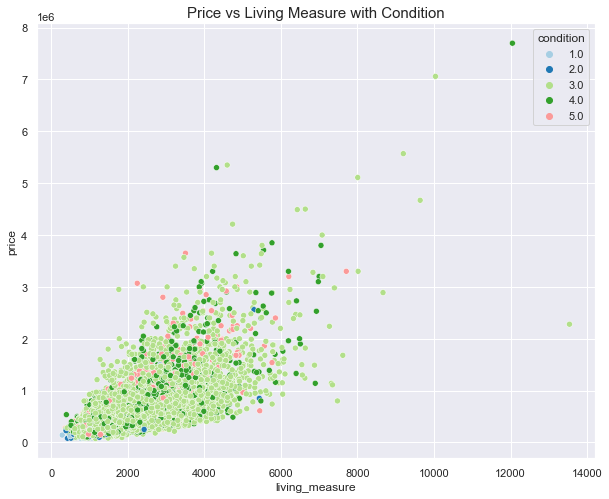

In [57]:
#Condition - Viewed in relation with price and living_measure. Most houses are rated as 3 or more.
#We can see some outliers as well
plt.figure(figsize=(10, 8))
print(
    sns.scatterplot(House_price['living_measure'],
                    House_price['price'],
                    hue=House_price['condition'],
                    palette='Paired',
                    legend='full'));
plt.title("Price vs Living Measure with Condition", size=15);

AxesSubplot(0.125,0.125;0.775x0.755)


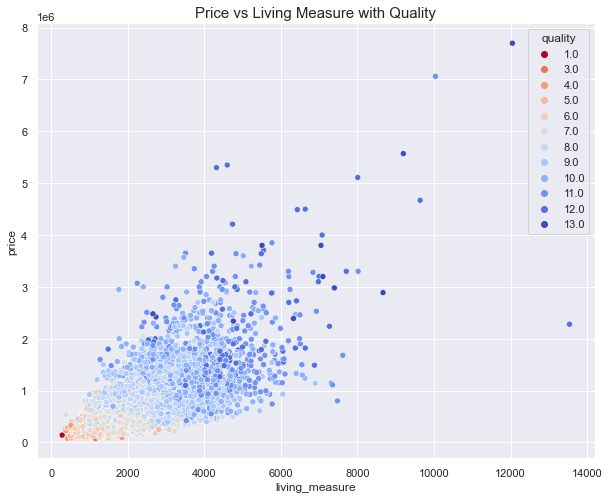

In [58]:
#quality - Viewed in relation with price and living_measure. Most houses are graded as 6 or more.
#We can see some outliers as well
plt.figure(figsize=(10, 8))
print(
    sns.scatterplot(House_price['living_measure'],
                    House_price['price'],
                    hue=House_price['quality'],
                    palette='coolwarm_r',
                    legend='full'));
plt.title("Price vs Living Measure with Quality", size=15);

AxesSubplot(0.125,0.125;0.775x0.755)


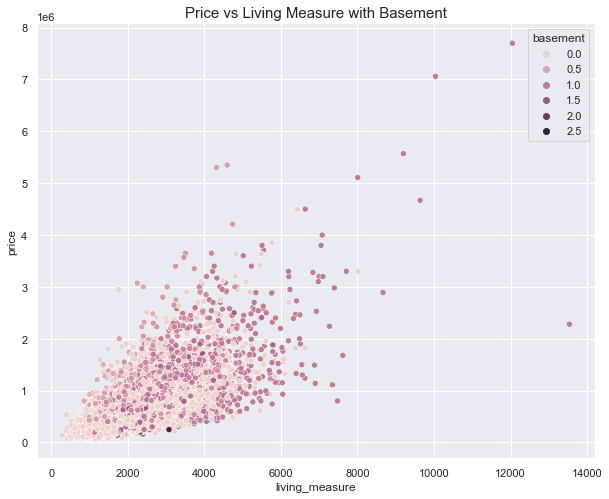

In [59]:
plt.figure(figsize=(10,8))
print(sns.scatterplot(House_price['living_measure'],House_price['price'],hue=House_price['basement']));
plt.title("Price vs Living Measure with Basement", size=15);

AxesSubplot(0.125,0.125;0.775x0.755)


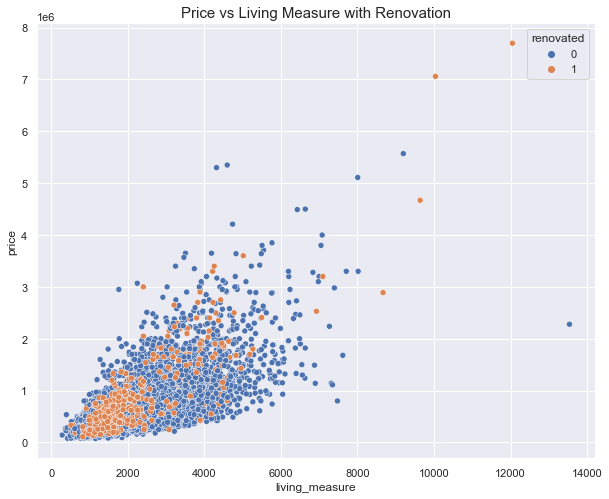

In [60]:
plt.figure(figsize=(10, 8))
print(sns.scatterplot(House_price['living_measure'],House_price['price'],hue=House_price['renovated']));
plt.title("Price vs Living Measure with Renovation", size=15);

### Outlier Treatment

In [61]:
House_price.head()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,furnished,total_area,yr_sold,renovated,building_age
2,735000,4.0,2.75,3040.0,2415.0,2.0,1.0,4.0,3.0,8.0,3040.0,0.0,1966.0,0,98118,47.5188,-122.256,0.0,5455.0,2014,0,48.0
3,257000,3.0,2.50,1740.0,3721.0,2.0,0.0,0.0,3.0,8.0,1740.0,0.0,2009.0,0,98002,47.3363,-122.213,0.0,5461.0,2014,0,5.0
6,466000,2.0,1.50,1140.0,1058.0,3.0,0.0,0.0,3.0,7.0,1140.0,0.0,2005.0,0,98103,47.6608,-122.333,0.0,2198.0,2014,0,9.0
7,1160000,4.0,3.50,4680.0,9700.0,2.0,0.0,0.0,3.0,10.0,3360.0,1.0,2005.0,0,98006,47.5703,-122.165,1.0,14380.0,2014,0,9.0
8,449950,4.0,2.50,3100.0,10000.0,2.0,0.0,0.0,3.0,9.0,3100.0,0.0,1978.0,0,98042,47.3741,-122.150,1.0,13100.0,2014,0,36.0


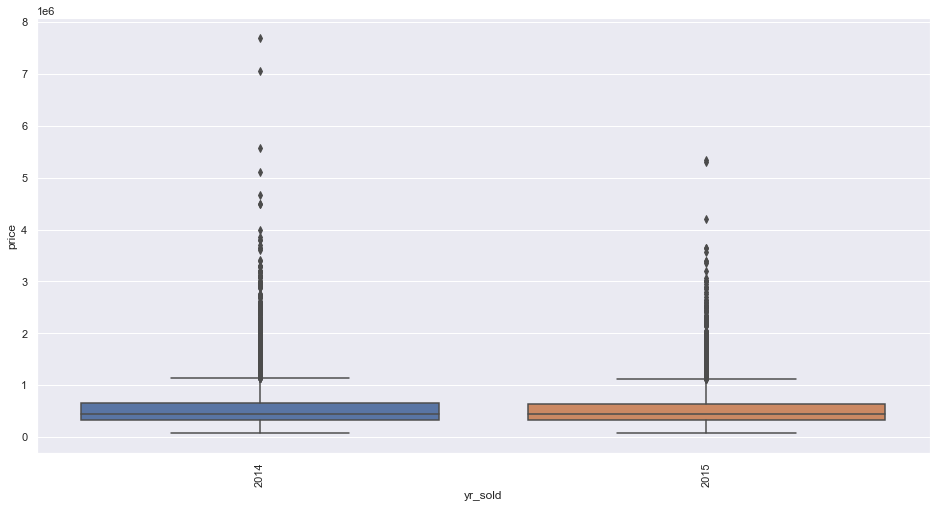

In [62]:
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='yr_sold', y="price", data=House_price)
plt.xticks(rotation=90);

**Year sold 2014 have more data than 2015.**

<AxesSubplot:xlabel='ceil', ylabel='price'>

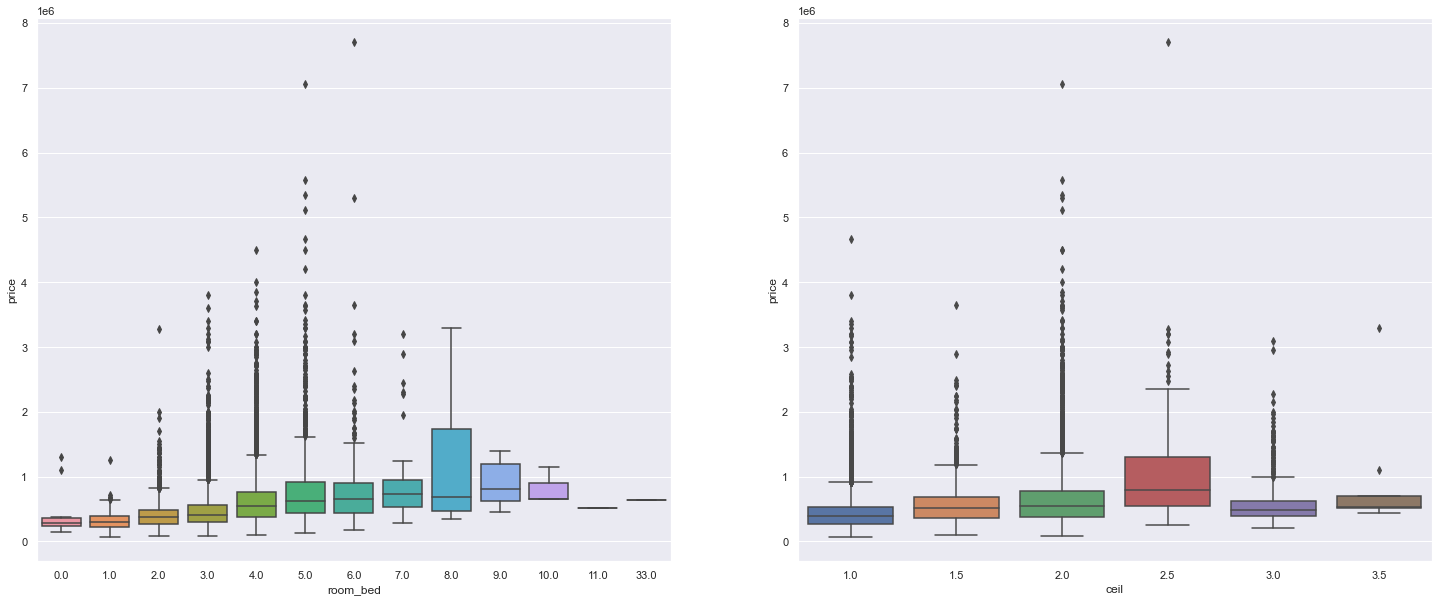

In [63]:
# Box Plot pair for number of bedrooms vs price and ceil vs price
f, axes = plt.subplots(1, 2,figsize=(25,10))
sns.boxplot(x=House_price['room_bed'],y=House_price['price'], ax=axes[0])
sns.boxplot(x=House_price['ceil'],y=House_price['price'], ax=axes[1])

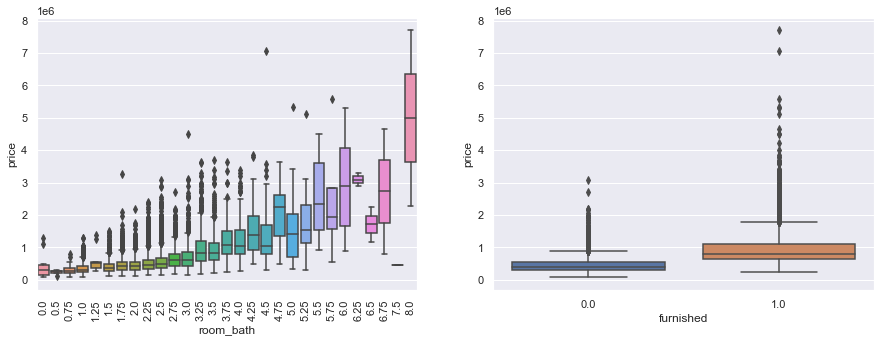

In [64]:
#Another box plot pair for number of bathrooms vs price and is house furnished or not vs price

f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=House_price['room_bath'],y=House_price['price'], ax=axes[0]);
labels = axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=90)
sns.boxplot(x=House_price['furnished'],y=House_price['price'], ax=axes[1]);

**From the above box plots we can see that many data points are in category of outliers falling above (Q3 + 1.5*IQR). Having to many outliers is not good for prediction model which eventually decreases the accuracy and increase error**

In [65]:
#Checking value counts for number of bedrooms
House_price['room_bed'].value_counts()

3.0     9672
4.0     6783
2.0     2720
5.0     1577
6.0      266
1.0      196
7.0       38
0.0       13
8.0       12
9.0        6
10.0       3
33.0       1
11.0       1
Name: room_bed, dtype: int64

In [66]:
House_price[House_price['room_bed']  == 33]

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,furnished,total_area,yr_sold,renovated,building_age
16913,640000,33.0,1.75,1620.0,6000.0,1.0,0.0,0.0,5.0,7.0,1040.0,1.0,1947.0,0,98103,47.6878,-122.331,0.0,7620.0,2014,0,67.0


**The living_measure and lot_measure are 1620 & 6000, no.of Bath is 1.75 while the number of bed is 33. This definitely looks like a erroeneous record. Dropping this record.**

In [67]:
House_price.drop(House_price[House_price['room_bed'] == 33].index, inplace=True)

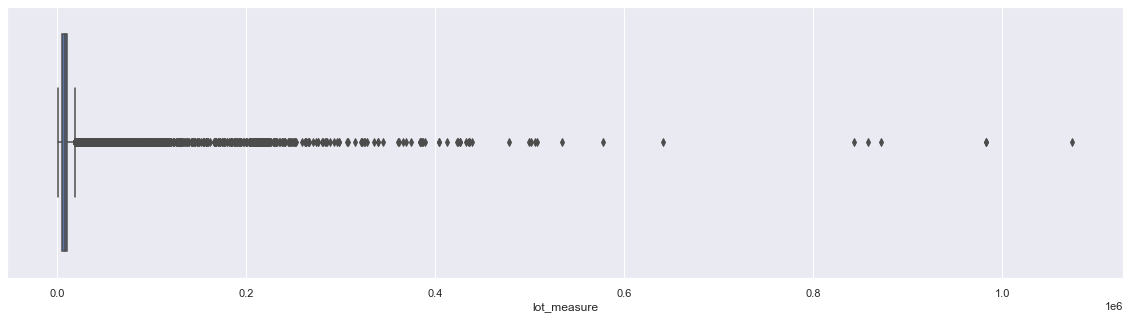

In [68]:
plt.figure(figsize=(20, 5))
sns.boxplot(House_price['lot_measure'])
plt.show()

In [69]:
rows, cols = House_price.drop(
    House_price[House_price['lot_measure'] > 435600].index).shape

original_row, _ = House_price.shape

print(
    f"Removing outliers with lot_measure >435600 or more than 10 acres, we removed :{original_row - rows} entries"
)

Removing outliers with lot_measure >435600 or more than 10 acres, we removed :15 entries


In [70]:
House_price.drop(House_price[House_price['lot_measure'] > 435600].index, inplace=True)

In [71]:
House_price.shape

(21272, 22)

In [72]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5 * IQR)
    upper_range = Q3+(1.5 * IQR)
    return lower_range,upper_range

In [73]:
lower_range_bed,Upper_range_bed = outlier_treatment(House_price.room_bed)
print(lower_range_bed,Upper_range_bed)

1.5 5.5


Text(0.5, 1.0, 'Bed Room Analysis')

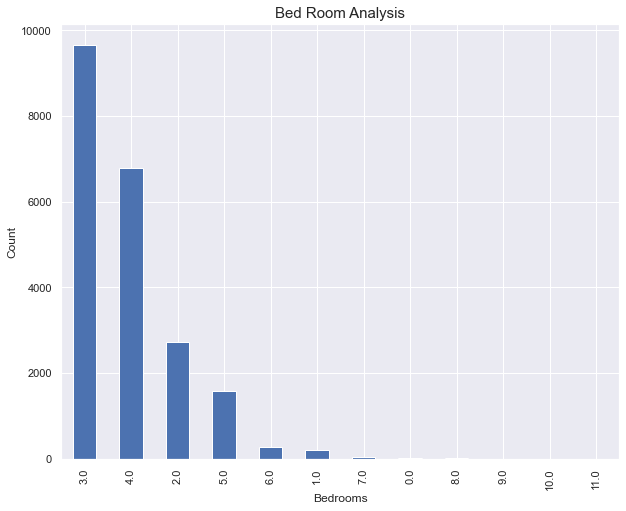

In [74]:
plt.figure(figsize=(10,8))
House_price['room_bed'].value_counts().plot(kind='bar')
plt.title('number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.title("Bed Room Analysis", size=15)

Basis Upper Bond & Lower Bond we can see that 1.5 to 5.5 is limit. Whereas as per box plot we can see that there are properties ranging from 1 bed rooms to 33 bed rooms. Lets see how many properties are there with above 6 bedrooms.

In [75]:
House_price[(House_price.room_bed > 8)].shape

(10, 22)

As There are 10 rows with more than 6 bedrooms. We will go ahead with them and drop it

Text(0.5, 1.0, 'Bath Room varaible Analysis')

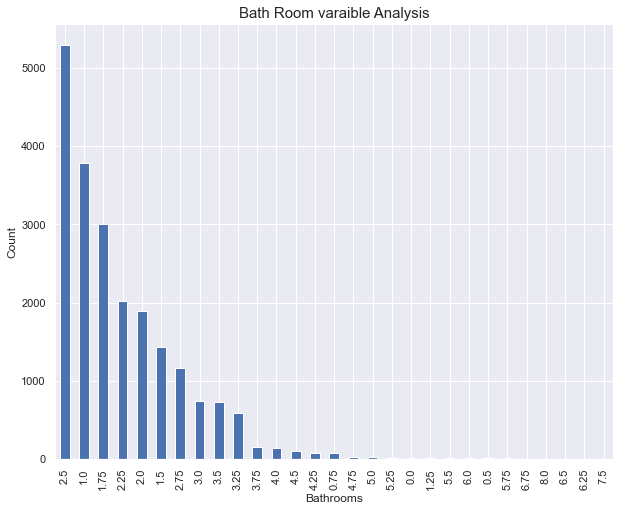

In [76]:
plt.figure(figsize=(10,8))
House_price['room_bath'].value_counts().plot(kind='bar')
plt.title('number of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Count')
plt.title("Bath Room varaible Analysis", size=15)

In [77]:
House_price.drop(House_price[ (House_price.room_bed > 6) ].index, inplace=True)

In [78]:
lower_range_room_bath,Upper_range_room_bath = outlier_treatment(House_price.room_bath)
print(lower_range_room_bath,Upper_range_room_bath)

0.0 4.0


In [79]:
House_price[(House_price.room_bath > 5)].shape

(33, 22)

No need to drop the columns 

In [80]:
housedf.shape

(21288, 23)

In [81]:
House_price.shape

(21212, 22)

In [82]:
(21288-21218)/21288

0.003288237504697482

### Correlation and VIF

In [83]:
house_corr = House_price.corr(method ='pearson')
house_corr

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,furnished,total_area,yr_sold,renovated,building_age
price,1.000000,0.312643,0.522335,0.671244,0.088989,0.254959,0.270451,0.396592,0.034884,0.668002,0.558186,0.159790,0.057253,0.126037,-0.053301,0.308919,0.022820,0.568335,0.107475,0.004864,0.125688,-0.108614
room_bed,0.312643,1.000000,0.524393,0.535491,0.041678,0.179290,-0.005903,0.082066,0.025248,0.372949,0.425249,0.131918,0.172421,0.014875,-0.165343,-0.017478,0.143485,0.272552,0.056601,-0.005517,0.014587,-0.181751
room_bath,0.522335,0.524393,1.000000,0.695277,0.089287,0.502098,0.063307,0.183570,-0.126826,0.667139,0.610501,0.134401,0.514479,0.047486,-0.208874,0.021758,0.227459,0.487156,0.108452,-0.025579,0.046994,-0.544875
living_measure,0.671244,0.535491,0.695277,1.000000,0.198311,0.328376,0.103669,0.280334,-0.065729,0.741453,0.869716,0.169153,0.313902,0.045846,-0.218970,0.054618,0.261696,0.624920,0.225457,-0.070191,0.045597,-0.335806
lot_measure,0.088989,0.041678,0.089287,0.198311,1.000000,-0.012505,0.026835,0.075957,-0.010655,0.126978,0.203371,-0.038791,0.065213,0.012170,-0.151869,-0.095121,0.265528,0.137098,0.999614,-0.029505,0.012279,-0.066656
ceil,0.254959,0.179290,0.502098,0.328376,-0.012505,1.000000,0.025297,0.028603,-0.265012,0.457567,0.494360,-0.265810,0.492749,0.003451,-0.059486,0.050270,0.125357,0.346771,-0.003125,-0.022205,0.003367,-0.507728
coast,0.270451,-0.005903,0.063307,0.103669,0.026835,0.025297,1.000000,0.400956,0.015499,0.083265,0.069825,0.033661,-0.025168,0.091142,0.030813,-0.014027,-0.040860,0.070277,0.029612,-0.003648,0.091537,-0.000401
sight,0.396592,0.082066,0.183570,0.280334,0.075957,0.028603,0.400956,1.000000,0.045796,0.249570,0.153726,0.177073,-0.052973,0.101360,0.085915,0.006833,-0.079663,0.219548,0.083445,0.001716,0.101486,0.018652
condition,0.034884,0.025248,-0.126826,-0.065729,-0.010655,-0.265012,0.015499,0.045796,1.000000,-0.147600,-0.166675,0.133202,-0.362840,-0.058945,0.004625,-0.015065,-0.107668,-0.123924,-0.012453,-0.043904,-0.058462,0.395988
quality,0.668002,0.372949,0.667139,0.741453,0.126978,0.457567,0.083265,0.249570,-0.147600,1.000000,0.716857,0.036326,0.450092,0.012030,-0.185658,0.114119,0.198661,0.788371,0.147226,-0.031529,0.011619,-0.463443


Text(0.5, 1.0, 'Correlation Matrix')

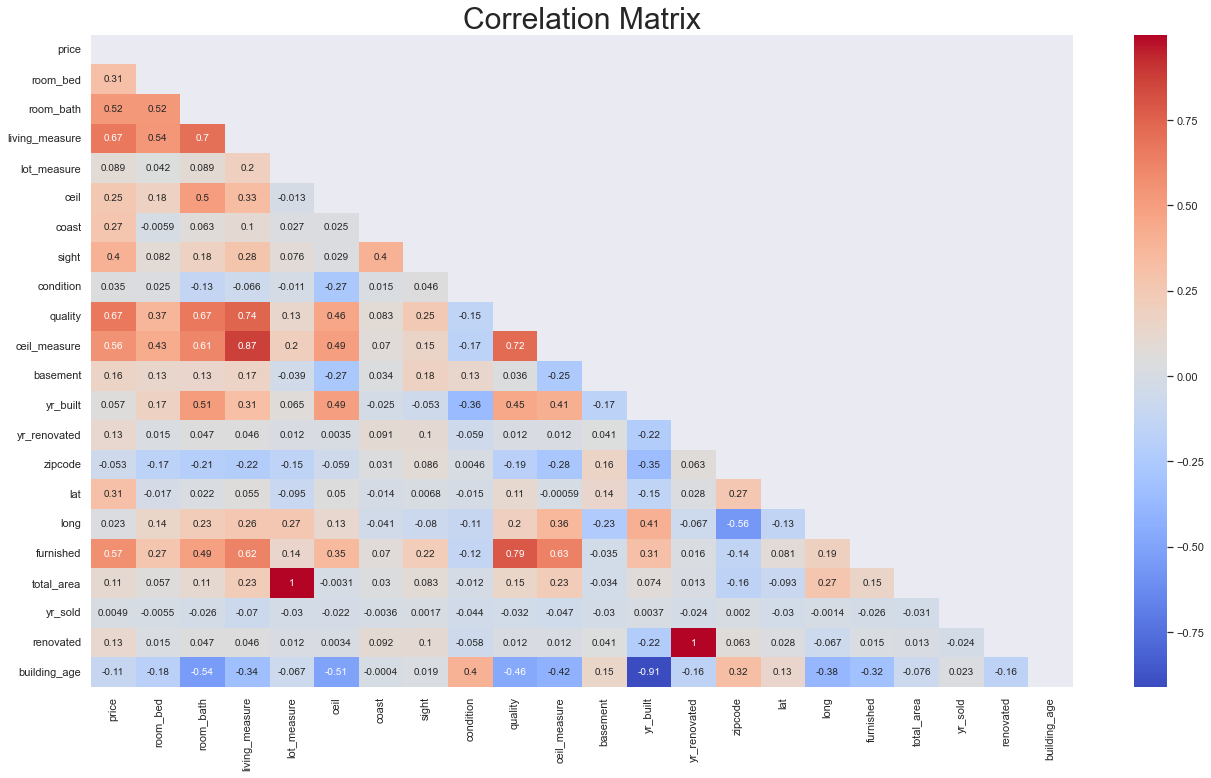

In [84]:
# Plotting heatmap
plt.subplots(figsize =(22, 12)) 
sns.heatmap(house_corr,cmap="coolwarm",annot=True, mask = np.triu(np.ones_like(house_corr, dtype=bool)))
plt.title("Correlation Matrix", size=30)

Text(0.5, 1.0, 'Correlation with Price Variable')

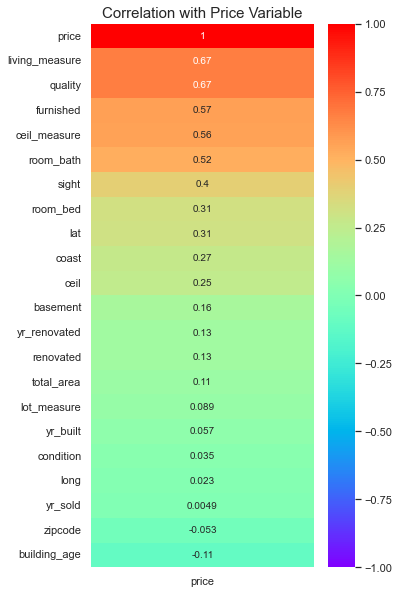

In [85]:
top_features = House_price.corr()[['price']].sort_values(by=['price'],ascending=False).head(30)
plt.figure(figsize=(5,10))
sns.heatmap(top_features,cmap='rainbow',annot=True,annot_kws={"size": 10},vmin=-1)
plt.title("Correlation with Price Variable", size=15)

#### VIF for continuous variables

In [86]:
df_cont = House_price[['price','room_bath','lot_measure','living_measure','ceil_measure','total_area','building_age']]

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(df_cont.values, ix) for ix in range(df_cont.shape[1])] 

i=0
for column in df_cont.columns:
    if i < 25:
        print (column ,"--->",  vif[i])
        i = i+1

price ---> 5.883419047112482
room_bath ---> 12.784721094655696
lot_measure ---> inf
living_measure ---> inf
ceil_measure ---> 25.48646302735704
total_area ---> inf
building_age ---> 1.9082931585924274


In [88]:
df_cont = df_cont.drop('lot_measure', axis=1)
df_cont

,price,room_bath,living_measure,ceil_measure,total_area,building_age
2,735000,2.75,3040.0,3040.000000,5455.0,48.0
3,257000,2.50,1740.0,1740.000000,5461.0,5.0
6,466000,1.50,1140.0,1140.000000,2198.0,9.0
7,1160000,3.50,4680.0,3360.000000,14380.0,9.0
8,449950,2.50,3100.0,3100.000000,13100.0,36.0
...,...,...,...,...,...,...
21333,625000,1.75,2260.0,1766.148148,19754.0,32.0
21345,1120000,3.50,2340.0,1521.413428,6340.0,1.0
21462,1180000,2.50,2410.0,2410.000000,12886.0,11.0
21507,250000,1.50,2430.0,1921.631799,26388.0,47.0


In [89]:
vif = [variance_inflation_factor(df_cont.values, ix) for ix in range(df_cont.shape[1])] 

i=0
for column in df_cont.columns:
    if i < 25:
        print (column ,"--->",  vif[i])
        i = i+1

price ---> 5.883419047112482
room_bath ---> 12.784721094655696
living_measure ---> 41.684463043725366
ceil_measure ---> 25.48646302735704
total_area ---> 1.363581216716419
building_age ---> 1.9082931585924277


In [90]:
df_cont = df_cont.drop('living_measure', axis=1)

In [91]:
vif = [variance_inflation_factor(df_cont.values, ix) for ix in range(df_cont.shape[1])] 

i=0
for column in df_cont.columns:
    if i < 25:
        print (column ,"--->",  vif[i])
        i = i+1

price ---> 5.108049141746535
room_bath ---> 10.242206740924997
ceil_measure ---> 10.941215093525244
total_area ---> 1.3515350898506253
building_age ---> 1.839306574758889


### Clustering

In [92]:
import matplotlib.cm as cm
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

from scipy.stats import zscore

In [93]:
df2 = House_price.copy()

In [94]:
data_scaled = df2.apply(zscore)
data_scaled.head()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,furnished,total_area,yr_sold,renovated,building_age
2,0.540484,0.731387,0.840915,1.167873,-0.381851,0.936245,11.543533,4.926446,-0.628859,0.293000,1.616149,-0.788076,-0.172657,-0.208774,0.748709,-0.296612,-0.299739,-0.494661,-0.346464,-0.691511,-0.208781,0.246148
3,-0.774992,-0.406684,0.512622,-0.366565,-0.337906,0.936245,-0.086629,-0.305147,-0.628859,0.293000,-0.041406,-0.788076,1.291306,-0.208774,-1.418344,-1.613203,0.005639,-0.494661,-0.346264,-0.691511,-0.208781,-1.245806
6,-0.199815,-1.544755,-0.800551,-1.074767,-0.427511,2.786924,-0.086629,-0.305147,-0.628859,-0.558385,-0.806432,-0.788076,1.155123,-0.208774,0.468487,0.727804,-0.846579,-0.494661,-0.455399,-0.691511,-0.208781,-1.107019
7,1.710102,0.731387,1.825794,3.103625,-0.136722,0.936245,-0.086629,-0.305147,-0.628859,1.995769,2.024163,1.266606,1.155123,-0.208774,-1.343618,0.074919,0.346527,2.021586,-0.047955,-0.691511,-0.208781,-1.107019
8,-0.243986,0.731387,0.512622,1.238693,-0.126627,0.936245,-0.086629,-0.305147,-0.628859,1.144384,1.692652,-0.788076,0.235891,-0.208774,-0.671084,-1.340507,0.453054,2.021586,-0.090767,-0.691511,-0.208781,-0.170212


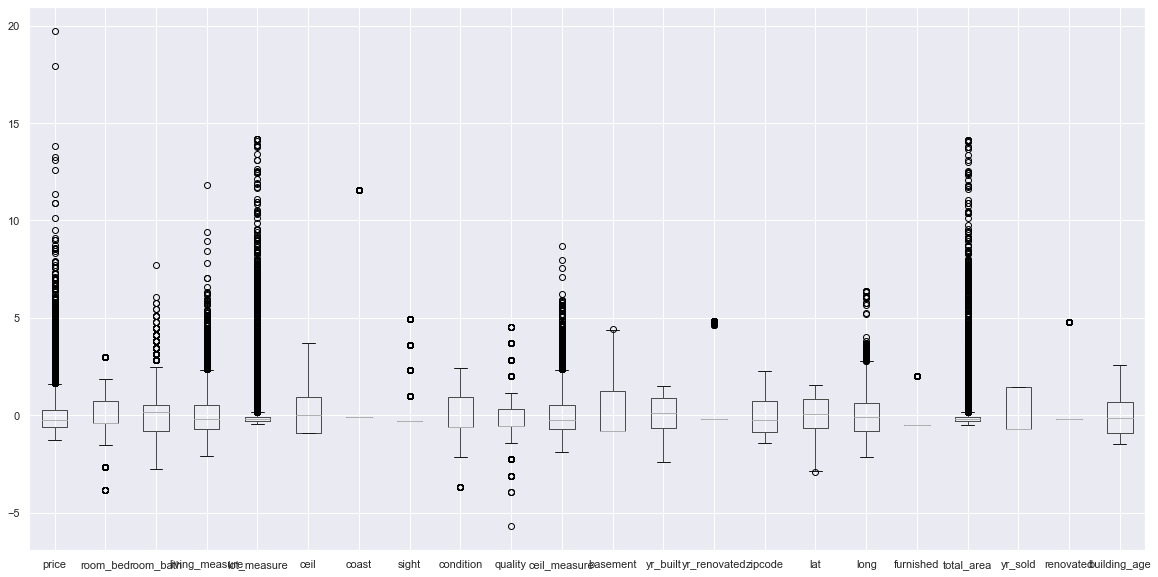

In [95]:
plt.figure(figsize=(20,10))
data_scaled.boxplot();

In [96]:
df3 = House_price.copy()

In [97]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(df3)
ne = sc.transform(df3)
ne = pd.DataFrame(ne)


In [98]:
ne.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,0.540484,0.731387,0.840915,1.167873,-0.381851,0.936245,11.543533,4.926446,-0.628859,0.293000,1.616149,-0.788076,-0.172657,-0.208774,0.748709,-0.296612,-0.299739,-0.494661,-0.346464,-0.691511,-0.208781,0.246148
1,-0.774992,-0.406684,0.512622,-0.366565,-0.337906,0.936245,-0.086629,-0.305147,-0.628859,0.293000,-0.041406,-0.788076,1.291306,-0.208774,-1.418344,-1.613203,0.005639,-0.494661,-0.346264,-0.691511,-0.208781,-1.245806
2,-0.199815,-1.544755,-0.800551,-1.074767,-0.427511,2.786924,-0.086629,-0.305147,-0.628859,-0.558385,-0.806432,-0.788076,1.155123,-0.208774,0.468487,0.727804,-0.846579,-0.494661,-0.455399,-0.691511,-0.208781,-1.107019
3,1.710102,0.731387,1.825794,3.103625,-0.136722,0.936245,-0.086629,-0.305147,-0.628859,1.995769,2.024163,1.266606,1.155123,-0.208774,-1.343618,0.074919,0.346527,2.021586,-0.047955,-0.691511,-0.208781,-1.107019
4,-0.243986,0.731387,0.512622,1.238693,-0.126627,0.936245,-0.086629,-0.305147,-0.628859,1.144384,1.692652,-0.788076,0.235891,-0.208774,-0.671084,-1.340507,0.453054,2.021586,-0.090767,-0.691511,-0.208781,-0.170212


In K-Means Clustering we have to choose the value of 'K' very accurately by looking at the Within Sum of Squares (WSS).

Since we have already scaled the data above, let us go ahead and perform the K-Means Clustering.

Since we do not know the value of 'K' i.e. the opitmum number of clusters we will start with 2 clusters and check the Within Sum of Squares (WSS).

The 'inertia' gives us the Within Sum of Squares (WSS) for the number of clusters defined in the KMeans function inside the 'sklearn' library.

In [99]:
k_means = KMeans(n_clusters = 2)
k_means.fit(data_scaled)
k_means.inertia_

384235.9492439552

In [100]:
k_means = KMeans(n_clusters = 3)
k_means.fit(data_scaled)
k_means.inertia_

341473.2529754242

In [101]:
k_means = KMeans(n_clusters = 4)
k_means.fit(data_scaled)
k_means.inertia_

306600.5666899331

In [102]:
wss = []
for i in range(2,11):
    km_model = KMeans(n_clusters= i )
    km_model.fit(data_scaled)
    wss.append(km_model.inertia_)

In [103]:
for i in range(2,11):
    print('The wss value for',i,'clusters is',wss[i-2])

The wss value for 2 clusters is 384235.5332141855
The wss value for 3 clusters is 347718.5668393675
The wss value for 4 clusters is 306604.3447822326
The wss value for 5 clusters is 278368.15631687175
The wss value for 6 clusters is 255747.6102113226
The wss value for 7 clusters is 235582.1118765017
The wss value for 8 clusters is 224549.24856234496
The wss value for 9 clusters is 214822.70893078097
The wss value for 10 clusters is 206130.87280799387


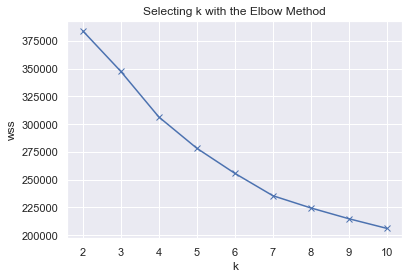

In [104]:
plt.plot(range(2,11), wss, 'bx-')
plt.xlabel('k')
plt.ylabel('wss')
plt.title('Selecting k with the Elbow Method');

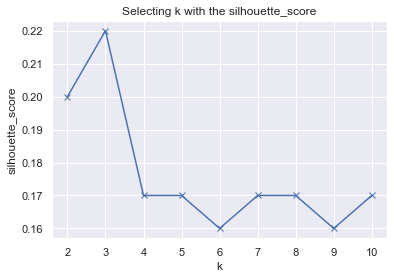

In [105]:
score = []

for i in range(2,11):
    km_model = KMeans(n_clusters= i,random_state = 42 )
    km_model.fit(data_scaled)
    score.append(round(silhouette_score(data_scaled, km_model.labels_),2))

plt.plot(range(2,11), score, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('Selecting k with the silhouette_score');

In [122]:
k_means = KMeans(n_clusters = 3)
k_means.fit(data_scaled)
labels = k_means.labels_

In [123]:
df2["Clus_kmeans"] = labels
df2.head()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,furnished,total_area,yr_sold,renovated,building_age,Clus_kmeans
2,735000,4.0,2.75,3040.0,2415.0,2.0,1.0,4.0,3.0,8.0,3040.0,0.0,1966.0,0,98118,47.5188,-122.256,0.0,5455.0,2014,0,48.0,1
3,257000,3.0,2.50,1740.0,3721.0,2.0,0.0,0.0,3.0,8.0,1740.0,0.0,2009.0,0,98002,47.3363,-122.213,0.0,5461.0,2014,0,5.0,1
6,466000,2.0,1.50,1140.0,1058.0,3.0,0.0,0.0,3.0,7.0,1140.0,0.0,2005.0,0,98103,47.6608,-122.333,0.0,2198.0,2014,0,9.0,0
7,1160000,4.0,3.50,4680.0,9700.0,2.0,0.0,0.0,3.0,10.0,3360.0,1.0,2005.0,0,98006,47.5703,-122.165,1.0,14380.0,2014,0,9.0,1
8,449950,4.0,2.50,3100.0,10000.0,2.0,0.0,0.0,3.0,9.0,3100.0,0.0,1978.0,0,98042,47.3741,-122.150,1.0,13100.0,2014,0,36.0,1


In [124]:
df_clust = df2.groupby('Clus_kmeans').mean()
df_clust = df_clust.reset_index()
round(df_clust,0)

,Clus_kmeans,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,furnished,total_area,yr_sold,renovated,building_age
0,0,421342.0,3.0,2.0,1650.0,10070.0,1.0,0.0,0.0,4.0,7.0,1333.0,0.0,1957.0,0.0,98090.0,48.0,-122.0,0.0,11720.0,2014.0,0.0,57.0
1,1,689622.0,4.0,3.0,2627.0,19078.0,2.0,0.0,0.0,3.0,9.0,2422.0,0.0,1995.0,0.0,98059.0,48.0,-122.0,0.0,21705.0,2014.0,0.0,19.0
2,2,757355.0,3.0,2.0,2236.0,15511.0,2.0,0.0,1.0,3.0,8.0,1817.0,0.0,1940.0,1996.0,98094.0,48.0,-122.0,0.0,17747.0,2014.0,1.0,18.0


In [125]:
df2.Clus_kmeans.value_counts().sort_index()

0    12164
1     8162
2      886
Name: Clus_kmeans, dtype: int64

In [117]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [118]:
HClust = linkage(data_scaled, method = 'ward')

In [121]:
from scipy.cluster.hierarchy import fcluster

clusters = fcluster(HClust, 3, criterion='maxclust')
clusters

array([3, 3, 3, ..., 3, 2, 2], dtype=int32)

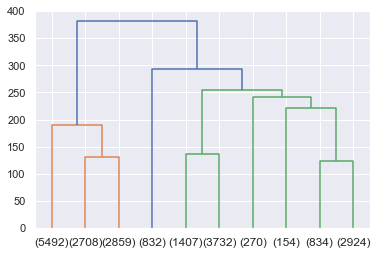

In [120]:
dend = dendrogram(HClust, truncate_mode='lastp',p = 10)

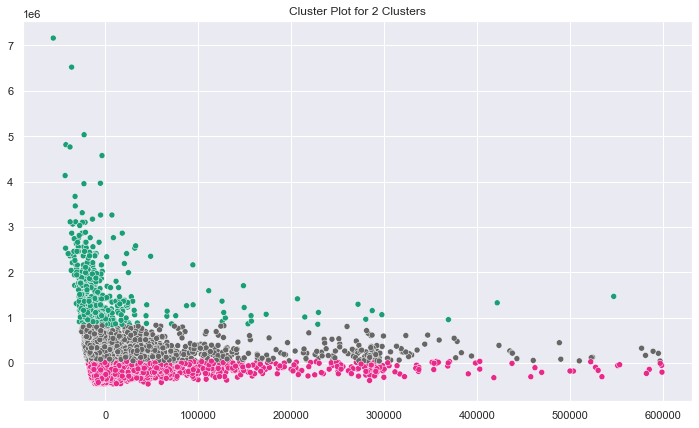

In [126]:
from sklearn.decomposition import PCA

pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(House_price)
plt.figure(figsize=(12, 7))
sns.scatterplot(x=plot_columns[:, 1],
                y=plot_columns[:, 0],
                hue=KMeans(n_clusters=3, random_state=0).fit(House_price).labels_,
                palette='Dark2_r',
                legend=False)
plt.title('Cluster Plot for 2 Clusters')
plt.show()

In [127]:
sil_width = silhouette_samples(data_scaled,labels)

In [128]:
df2["sil_width"] = sil_width
df2.head()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,furnished,total_area,yr_sold,renovated,building_age,Clus_kmeans,sil_width
2,735000,4.0,2.75,3040.0,2415.0,2.0,1.0,4.0,3.0,8.0,3040.0,0.0,1966.0,0,98118,47.5188,-122.256,0.0,5455.0,2014,0,48.0,1,0.017094
3,257000,3.0,2.50,1740.0,3721.0,2.0,0.0,0.0,3.0,8.0,1740.0,0.0,2009.0,0,98002,47.3363,-122.213,0.0,5461.0,2014,0,5.0,1,0.080398
6,466000,2.0,1.50,1140.0,1058.0,3.0,0.0,0.0,3.0,7.0,1140.0,0.0,2005.0,0,98103,47.6608,-122.333,0.0,2198.0,2014,0,9.0,0,0.064138
7,1160000,4.0,3.50,4680.0,9700.0,2.0,0.0,0.0,3.0,10.0,3360.0,1.0,2005.0,0,98006,47.5703,-122.165,1.0,14380.0,2014,0,9.0,1,0.284076
8,449950,4.0,2.50,3100.0,10000.0,2.0,0.0,0.0,3.0,9.0,3100.0,0.0,1978.0,0,98042,47.3741,-122.150,1.0,13100.0,2014,0,36.0,1,0.239491


In [129]:
silhouette_samples(data_scaled,labels).min()

-0.10060844189911189

In [130]:
silhouette_samples(data_scaled,labels).max()

0.432877270763776

### Data Transformation

In [131]:
data1 = House_price.copy()

In [132]:
data1.shape

(21212, 22)

In [133]:
data1 = pd.get_dummies(data1)

In [134]:
data1.shape

(21212, 22)

In [135]:
data1.head()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,furnished,total_area,yr_sold,renovated,building_age
2,735000,4.0,2.75,3040.0,2415.0,2.0,1.0,4.0,3.0,8.0,3040.0,0.0,1966.0,0,98118,47.5188,-122.256,0.0,5455.0,2014,0,48.0
3,257000,3.0,2.50,1740.0,3721.0,2.0,0.0,0.0,3.0,8.0,1740.0,0.0,2009.0,0,98002,47.3363,-122.213,0.0,5461.0,2014,0,5.0
6,466000,2.0,1.50,1140.0,1058.0,3.0,0.0,0.0,3.0,7.0,1140.0,0.0,2005.0,0,98103,47.6608,-122.333,0.0,2198.0,2014,0,9.0
7,1160000,4.0,3.50,4680.0,9700.0,2.0,0.0,0.0,3.0,10.0,3360.0,1.0,2005.0,0,98006,47.5703,-122.165,1.0,14380.0,2014,0,9.0
8,449950,4.0,2.50,3100.0,10000.0,2.0,0.0,0.0,3.0,9.0,3100.0,0.0,1978.0,0,98042,47.3741,-122.150,1.0,13100.0,2014,0,36.0


In [136]:
Houseprice1 = House_price[[
    'price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure', 'ceil',
    'coast', 'sight', 'condition', 'quality', 'ceil_measure', 'basement',
    'furnished', 'total_area', 'renovated', 'building_age'
]]
Houseprice1.head()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,furnished,total_area,renovated,building_age
2,735000,4.0,2.75,3040.0,2415.0,2.0,1.0,4.0,3.0,8.0,3040.0,0.0,0.0,5455.0,0,48.0
3,257000,3.0,2.50,1740.0,3721.0,2.0,0.0,0.0,3.0,8.0,1740.0,0.0,0.0,5461.0,0,5.0
6,466000,2.0,1.50,1140.0,1058.0,3.0,0.0,0.0,3.0,7.0,1140.0,0.0,0.0,2198.0,0,9.0
7,1160000,4.0,3.50,4680.0,9700.0,2.0,0.0,0.0,3.0,10.0,3360.0,1.0,1.0,14380.0,0,9.0
8,449950,4.0,2.50,3100.0,10000.0,2.0,0.0,0.0,3.0,9.0,3100.0,0.0,1.0,13100.0,0,36.0


In [137]:
Houseprice1.shape

(21212, 16)

In [138]:
Houseprice1.to_excel("HousePriceoutput.xlsx", index=False)  

## Load the Data

In [143]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline 
sns.set_palette("deep")
pd.pandas.set_option('display.max_columns',None)

#Supress warnings
import warnings
warnings.filterwarnings('ignore')


In [144]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor,
    AdaBoostRegressor,
    GradientBoostingRegressor,
    StackingRegressor,
)
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

from sklearn import metrics
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

# Evaluation Metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as rs
from sklearn.metrics import mean_absolute_percentage_error

#import xgboost
from xgboost import XGBRegressor
from xgboost import plot_importance  # to plot feature importance


In [145]:
house_price= pd.read_excel('HousePriceoutput.xlsx')
house_price.head()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,furnished,total_area,renovated,building_age
0,735000,4,2.75,3040,2415,2.0,1,4,3,8,3040.0,0.0,0,5455,0,48
1,257000,3,2.50,1740,3721,2.0,0,0,3,8,1740.0,0.0,0,5461,0,5
2,466000,2,1.50,1140,1058,3.0,0,0,3,7,1140.0,0.0,0,2198,0,9
3,1160000,4,3.50,4680,9700,2.0,0,0,3,10,3360.0,1.0,1,14380,0,9
4,449950,4,2.50,3100,10000,2.0,0,0,3,9,3100.0,0.0,1,13100,0,36


## Linear Regression with Stats Model

In [146]:
import statsmodels.formula.api as SM

In [147]:
House_Price_allvar = pd.get_dummies(house_price, drop_first=True)
House_Price_allvar.head()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,furnished,total_area,renovated,building_age
0,735000,4,2.75,3040,2415,2.0,1,4,3,8,3040.0,0.0,0,5455,0,48
1,257000,3,2.50,1740,3721,2.0,0,0,3,8,1740.0,0.0,0,5461,0,5
2,466000,2,1.50,1140,1058,3.0,0,0,3,7,1140.0,0.0,0,2198,0,9
3,1160000,4,3.50,4680,9700,2.0,0,0,3,10,3360.0,1.0,1,14380,0,9
4,449950,4,2.50,3100,10000,2.0,0,0,3,9,3100.0,0.0,1,13100,0,36


In [148]:
f_1 = 'price~room_bed+room_bath+living_measure+lot_measure+ceil+coast+sight+condition+quality+ceil_measure+basement+furnished+total_area+renovated+building_age'

In [149]:
OLSmodel_1 = SM.ols(f_1,data=House_Price_allvar).fit()
OLSmodel_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     2714.
Date:                Sun, 03 Jul 2022   Prob (F-statistic):               0.00
Time:                        20:14:14   Log-Likelihood:            -2.9079e+05
No. Observations:               21212   AIC:                         5.816e+05
Df Residuals:                   21197   BIC:                         5.817e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.053e+06   2.01e+04    -52.541      0.000   -1.09e+06   -1.01e+06
room_bed       -2.813e+04   2139.891    -13.143      0.000   -3.23e+04   -2.39e+04
room_bath       7.557e+04   3487.881     21.668      0.000    6.87e+04    8.24e+04
living_measure   114.3029      4.641     24.631      0.000     105.207     123.399
lot_measure      -57.3501      2.322    -24.701      0.000     -61.901     -52.799
ceil            3.076e+04   3806.923      8.079      0.000    2.33e+04    3.82e+04
coast           5.899e+05    1.9e+04     30.991      0.000    5.53e+05    6.27e+05
sight           4.357e+04   2298.355     18.956      0.000    3.91e+04    4.81e+04
condition       1.801e+04   2554.255      7.050      0.000     1.3e+04     2.3e+04
quality         1.283e+05   2662.750     48.185      0.000    1.23e+05    1.34e+05
ceil_measure     -49.3293      7.354     -6.707      0.000     -63.745     -34.914
basement        -1.69e+04   5524.296     -3.060      0.002   -2.77e+04   -6074.650
furnished       4.933e+04   6278.893      7.857      0.000     3.7e+04    6.16e+04
total_area        56.9528      2.319     24.558      0.000      52.407      61.499
renovated       2.279e+05   7710.586     29.558      0.000    2.13e+05    2.43e+05
building_age    3713.0807     73.512     50.510      0.000    3568.992    3857.169
==============================================================================
Omnibus:                    16002.057   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1083495.187
Skew:                           3.048   Prob(JB):                         0.00
Kurtosis:                      37.478   Cond. No.                     6.49e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.12e-18. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [150]:
def vif_cal(input_data):
    x_vars = input_data
    xvar_names = input_data.columns
    for i in range(len(xvar_names)):
        y = x_vars[xvar_names[i]]
        x = x_vars[xvar_names.drop(xvar_names[i])]
        rsq = SM.ols(formula="y~x", data=x_vars).fit().rsquared
        vif = round(1 / (1 - rsq), 2)
        print(xvar_names[i], " VIF = ", vif)

In [151]:
vif_cal(input_data= House_Price_allvar.drop('price', axis=1))

room_bed  VIF =  1.59
room_bath  VIF =  3.16
living_measure  VIF =  inf
lot_measure  VIF =  inf
ceil  VIF =  1.9
coast  VIF =  1.2
sight  VIF =  1.38
condition  VIF =  1.24
quality  VIF =  4.39
ceil_measure  VIF =  14.92
basement  VIF =  3.24
furnished  VIF =  2.79
total_area  VIF =  inf
renovated  VIF =  1.07
building_age  VIF =  2.01


The above values corroborates our understanding of vif. Since there was a presence of multicollinearity we see that the vif values are very high in living_measure, lot_measure, ceil_measure, basement & total_area .

If variables are decided to be dropped on the basis of vif, we will drop them one by one. After one variable is dropped we are going to run the regression model and the vif function. Then if needed we will drop more variables.

Dropping variables means losing out on information. That can hamper the predictive as well as the descriptive power of the model.

**Dropping Features one by one**

In [152]:
House_Price_Drop_lot_measure = House_Price_allvar[[
'price', 'room_bed', 'room_bath','living_measure','ceil', 'coast', 'sight', 'condition', 'quality', 'basement',
    'furnished','total_area','renovated', 'building_age'
]]
House_Price_Drop_lot_measure.head()

,price,room_bed,room_bath,living_measure,ceil,coast,sight,condition,quality,basement,furnished,total_area,renovated,building_age
0,735000,4,2.75,3040,2.0,1,4,3,8,0.0,0,5455,0,48
1,257000,3,2.50,1740,2.0,0,0,3,8,0.0,0,5461,0,5
2,466000,2,1.50,1140,3.0,0,0,3,7,0.0,0,2198,0,9
3,1160000,4,3.50,4680,2.0,0,0,3,10,1.0,1,14380,0,9
4,449950,4,2.50,3100,2.0,0,0,3,9,0.0,1,13100,0,36


In [153]:
f_2 = 'price~room_bed+room_bath+living_measure+ceil+coast+sight+condition+quality+basement+furnished+total_area+renovated+building_age'

In [154]:
OLSmodel_2 = SM.ols(f_2,data=House_Price_Drop_lot_measure).fit()
OLSmodel_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     2914.
Date:                Sun, 03 Jul 2022   Prob (F-statistic):               0.00
Time:                        20:14:27   Log-Likelihood:            -2.9081e+05
No. Observations:               21212   AIC:                         5.816e+05
Df Residuals:                   21198   BIC:                         5.818e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.061e+06      2e+04    -52.931      0.000    -1.1e+06   -1.02e+06
room_bed       -2.697e+04   2135.206    -12.633      0.000   -3.12e+04   -2.28e+04
room_bath       7.757e+04   3478.839     22.296      0.000    7.07e+04    8.44e+04
living_measure   130.1656      3.199     40.686      0.000     123.895     136.436
ceil            2.423e+04   3684.139      6.576      0.000     1.7e+04    3.14e+04
coast           5.891e+05   1.91e+04     30.919      0.000    5.52e+05    6.26e+05
sight           4.573e+04   2278.057     20.073      0.000    4.13e+04    5.02e+04
condition       1.962e+04   2545.579      7.707      0.000    1.46e+04    2.46e+04
quality          1.27e+05   2657.903     47.766      0.000    1.22e+05    1.32e+05
basement        1.179e+04   3498.772      3.370      0.001    4933.990    1.86e+04
furnished       4.791e+04   6281.838      7.627      0.000    3.56e+04    6.02e+04
total_area        -0.4106      0.052     -7.890      0.000      -0.513      -0.309
renovated       2.303e+05   7710.590     29.863      0.000    2.15e+05    2.45e+05
building_age    3722.3920     73.575     50.593      0.000    3578.180    3866.604
==============================================================================
Omnibus:                    16120.817   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1120424.174
Skew:                           3.076   Prob(JB):                         0.00
Kurtosis:                      38.069   Cond. No.                     4.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [155]:
vif_cal(input_data= House_Price_Drop_lot_measure.drop('price', axis=1))

room_bed  VIF =  1.57
room_bath  VIF =  3.14
living_measure  VIF =  3.29
ceil  VIF =  1.77
coast  VIF =  1.2
sight  VIF =  1.36
condition  VIF =  1.23
quality  VIF =  4.36
basement  VIF =  1.3
furnished  VIF =  2.79
total_area  VIF =  1.08
renovated  VIF =  1.06
building_age  VIF =  2.01


In [156]:
model_MLR_1_pred = OLSmodel_1.fittedvalues
model_MLR_2_pred = OLSmodel_2.fittedvalues

In [157]:
from sklearn import metrics

metrics.mean_squared_error(House_Price_allvar['price'], model_MLR_1_pred,squared=False)

217431.85366913475

In [158]:
metrics.mean_squared_error(House_Price_Drop_lot_measure['price'], model_MLR_2_pred,squared=False)

217662.4717754244

## Machine Learning Models

In [159]:
house_price.columns

Index(['price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'coast', 'sight', 'condition', 'quality', 'ceil_measure',
       'basement', 'furnished', 'total_area', 'renovated', 'building_age'],
      dtype='object')

In [160]:
house_price.shape

(21212, 16)

In [161]:
# Copy all the predictor variables into X dataframe
X = house_price.drop('price', axis=1)

# Copy target into the y dataframe. 
y = house_price[['price']]

In [162]:
#Splitting the dataset into the traing set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [163]:
# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import Ridge  # Linear Regression + L2 regularization
from sklearn.linear_model import Lasso  # Linear Regression + L1 regularization
from sklearn.svm import SVR # Support Vector Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Evaluation Metrics
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as rs
from sklearn.metrics import mean_absolute_percentage_error

#import xgboost
from xgboost import XGBRegressor
from xgboost import plot_importance  # to plot feature importance

### Linear Reg

In [164]:
# Created a linear model
LR_model=LinearRegression()
LR_model.fit(X_train,y_train)

LinearRegression()

In [165]:
## Predict Train results
y_train_pred = LR_model.predict(X_train)

## Predict Test results
y_pred = LR_model.predict(X_test)

In [166]:
LR_RMSE_Train = metrics.mean_squared_error(y_train.values, y_train_pred,squared=False)
LR_R2_Train = metrics.r2_score(y_train.values, y_train_pred) 
LR_MAPE_Train = metrics.mean_absolute_percentage_error(y_train.values, y_train_pred) 

print("Train Results for MultiLinear Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_train.values, y_train_pred))

Train Results for MultiLinear Regression:
*******************************
Root mean squared error:  220898.61462199115
R-squared:  0.6411890688108334
Mean Absolute Percentage Error:  0.2942963316284728


In [167]:
results_train = pd.DataFrame([['MultiLinear Reg Train', LR_RMSE_Train, LR_R2_Train, LR_MAPE_Train]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])
results_train

,Model,RMSE,Adjusted_r_2,MAPE
0,MultiLinear Reg Train,220898.614622,0.641189,0.294296


In [168]:
#entering metrics score to the metics dataframe
LR_RMSE_Test = metrics.mean_squared_error(y_test, y_pred,squared=False)
LR_R2_Test = metrics.r2_score(y_test, y_pred) 
LR_MAPE_Test = metrics.mean_absolute_percentage_error(y_test, y_pred) 


print("Test Results for MultiLinear Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_test, y_pred))

Test Results for MultiLinear Regression:
*******************************
Root mean squared error:  209334.2536414096
R-squared:  0.6429915064035132
Mean Absolute Percentage Error:  0.2960042835520663


In [169]:
results_test = pd.DataFrame([['MultiLinear Reg Test', LR_RMSE_Test, LR_R2_Test, LR_MAPE_Test]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])
results_test

,Model,RMSE,Adjusted_r_2,MAPE
0,MultiLinear Reg Test,209334.253641,0.642992,0.296004


In [170]:
#KFold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10)
results = cross_val_score(LR_model, X_train, y_train, cv=kfold)
print(results)
accu_k_lr=results.mean()
print("Accuracy: %.3f%% (%.3f%%)" % (accu_k_lr, results.std()*100.0))

[0.63854779 0.66488383 0.61209451 0.62700178 0.68092929 0.62832907
 0.61974113 0.64928171 0.64371551 0.61999066]
Accuracy: 0.638% (2.066%)


### Random Forest Regression

In [171]:
#created a Random forest model
RF_model=RandomForestRegressor()
RF_model.fit(X_train,y_train)

RandomForestRegressor()

In [172]:
y_pred = RF_model.predict(X_test)
print('Performance on training data using Random Forest:',RF_model.score(X_train,y_train))
print('Performance on testing data using Random Forest:',RF_model.score(X_test,y_test))
acc_RF=metrics.r2_score(y_test, y_pred)
print('Accuracy RF: ',acc_RF)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))

Performance on training data using Random Forest: 0.9605603506974153
Performance on testing data using Random Forest: 0.714002974746371
Accuracy RF:  0.714002974746371
MSE:  35104562431.29669
MAE: 119644.95219618539


In [173]:
%%time
tuned_params = {
        'n_estimators': [400, 500, 600, 700, 800,1000],
    'max_features': [4,5,6,7],
    'min_samples_split': [2, 5, 10, 12, 13],
    'min_samples_leaf': [3, 4, 5],
    'max_depth': [3, 7, 9, 11, 13],
}

rf_model = RandomizedSearchCV(RandomForestRegressor(), tuned_params, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)

rf_model.fit(X_train, y_train)

CPU times: total: 18.9 s
Wall time: 2min 18s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [3, 7, 9, 11, 13],
                                        'max_features': [4, 5, 6, 7],
                                        'min_samples_leaf': [3, 4, 5],
                                        'min_samples_split': [2, 5, 10, 12, 13],
                                        'n_estimators': [400, 500, 600, 700,
                                                         800, 1000]},
                   scoring='neg_mean_absolute_error')

In [174]:
rf_model.best_estimator_

RandomForestRegressor(max_depth=13, max_features=7, min_samples_leaf=5,
                      min_samples_split=13, n_estimators=700)

In [175]:
## Predict Train results
y_train_pred = rf_model.predict(X_train)

In [176]:
## Predict Test results
y_pred = rf_model.predict(X_test)

In [177]:
#entering metrics score to the metics dataframe
RF_RMSE_Train = metrics.mean_squared_error(y_train.values, y_train_pred,squared=False)
RF_R2_Train = metrics.r2_score(y_train.values, y_train_pred) 
RF_MAPE_Train = metrics.mean_absolute_percentage_error(y_train.values, y_train_pred) 

print("Train Results for Random Forest Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_train.values, y_train_pred))

Train Results for Random Forest Regression:
*******************************
Root mean squared error:  158637.67838711943
R-squared:  0.8149486013242405
Mean Absolute Percentage Error:  0.21755573691114424


In [178]:
model_results = pd.DataFrame([['Random Forest Train', RF_RMSE_Train, RF_R2_Train, RF_MAPE_Train]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

results_train = results_train.append(model_results, ignore_index = True)
results_train

,Model,RMSE,Adjusted_r_2,MAPE
0,MultiLinear Reg Train,220898.614622,0.641189,0.294296
1,Random Forest Train,158637.678387,0.814949,0.217556


In [179]:
#entering metrics score to the metics dataframe
RF_RMSE_Test = metrics.mean_squared_error(y_test, y_pred,squared=False)
RF_R2_Test = metrics.r2_score(y_test, y_pred) 
RF_MAPE_Test = metrics.mean_absolute_percentage_error(y_test, y_pred) 


print("Test Results for Random Forest Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_test, y_pred))

Test Results for Random Forest Regression:
*******************************
Root mean squared error:  187555.85008303978
R-squared:  0.7134112214058477
Mean Absolute Percentage Error:  0.25134204913777625


In [180]:
model_results = pd.DataFrame([['Random Forest Test', RF_RMSE_Test, RF_R2_Test, RF_MAPE_Test]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

results_test = results_test.append(model_results, ignore_index = True)
results_test

,Model,RMSE,Adjusted_r_2,MAPE
0,MultiLinear Reg Test,209334.253641,0.642992,0.296004
1,Random Forest Test,187555.850083,0.713411,0.251342


##### Feature Importance

In [181]:
## Building the model again with the best hyperparameters
rf_model = RandomForestRegressor(min_samples_split=5,
                                 n_estimators=1000,
                                 max_depth=11,
                                 max_features=7,
                                 min_samples_leaf=3)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=11, max_features=7, min_samples_leaf=3,
                      min_samples_split=5, n_estimators=1000)

In [182]:
pd.Series(rf_model.feature_importances_,index=X_train.columns).sort_values(ascending=False)

quality           0.291430
living_measure    0.177448
furnished         0.158496
room_bath         0.074700
building_age      0.072041
ceil_measure      0.041910
sight             0.040700
coast             0.038518
lot_measure       0.026749
total_area        0.024549
basement          0.017046
renovated         0.014757
condition         0.009916
room_bed          0.007043
ceil              0.004697
dtype: float64

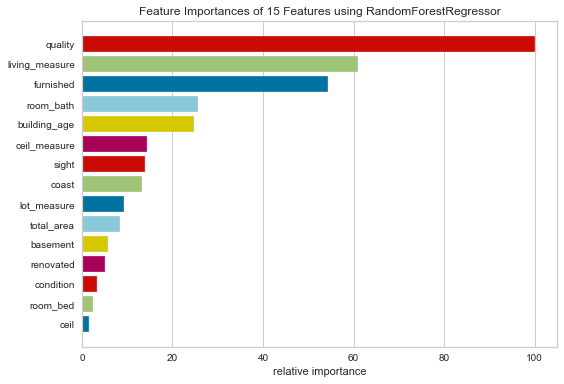

<AxesSubplot:title={'center':'Feature Importances of 15 Features using RandomForestRegressor'}, xlabel='relative importance'>

In [183]:
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(rf_model)
viz.fit(X, y)
viz.show()

### Descision Tree Regression

In [184]:
#Created a Decision Tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train , y_train)

DecisionTreeRegressor()

In [185]:
y_pred = dt_model.predict(X_test)
print('Performance on training data using Decision Tree:',dt_model.score(X_train,y_train))
print('Performance on testing data using Decison Tree:',dt_model.score(X_test,y_test))
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))

Performance on training data using Decision Tree: 0.9999283882421298
Performance on testing data using Decison Tree: 0.49081329989244105
Accuracy DT:  0.49081329989244105
MSE:  62499867917.367226
MAE: 159522.57401005656


In [186]:
#reducing overfitting
tuned_params = {
    'min_samples_split': [ 7, 9 , 11], 
    'min_samples_leaf': [3,4,5], 
    'max_depth': [8, 9, 10]
}

dt_model = GridSearchCV(DecisionTreeRegressor(), tuned_params, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)

dt_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [8, 9, 10], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [7, 9, 11]},
             scoring='neg_mean_absolute_error')

In [187]:
dt_model.best_estimator_

DecisionTreeRegressor(max_depth=10, min_samples_leaf=5, min_samples_split=11)

In [188]:
## Predict Train results
y_train_pred = dt_model.predict(X_train)

In [189]:
## Predict Test results
y_pred = dt_model.predict(X_test)

In [190]:
#entering metrics score to the metics dataframe
DT_RMSE_Train = metrics.mean_squared_error(y_train.values, y_train_pred,squared=False) 
DT_R2_Train = metrics.r2_score(y_train.values, y_train_pred) 
DT_MAPE_Train = metrics.mean_absolute_percentage_error(y_train.values, y_train_pred) 


print("Train Results for Decision Tree Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_train.values, y_train_pred))

Train Results for Decision Tree Regression:
*******************************
Root mean squared error:  167907.1369970489
R-squared:  0.7926910776820104
Mean Absolute Percentage Error:  0.23891936187718724


In [191]:
model_results = pd.DataFrame([['Decision Tree Train', DT_RMSE_Train, DT_R2_Train, DT_MAPE_Train]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

results_train = results_train.append(model_results, ignore_index = True)
results_train

,Model,RMSE,Adjusted_r_2,MAPE
0,MultiLinear Reg Train,220898.614622,0.641189,0.294296
1,Random Forest Train,158637.678387,0.814949,0.217556
2,Decision Tree Train,167907.136997,0.792691,0.238919


In [192]:
#entering metrics score to the metics dataframe
DT_RMSE_Test = metrics.mean_squared_error(y_test, y_pred,squared=False)
DT_R2_Test = metrics.r2_score(y_test, y_pred) 
DT_MAPE_Test = metrics.mean_absolute_percentage_error(y_test, y_pred) 


print("Test Results for Decision Tree Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", rs(y_test, y_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_test, y_pred))

Test Results for Decision Tree Regression:
*******************************
Root mean squared error:  217619.6344916441
R-squared:  0.6141716773135697
Mean Absolute Percentage Error:  0.26807236698458076


In [193]:
model_results = pd.DataFrame([['Decision Tree Test', DT_RMSE_Test, DT_R2_Test, DT_MAPE_Test]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

results_test = results_test.append(model_results, ignore_index = True)
results_test

,Model,RMSE,Adjusted_r_2,MAPE
0,MultiLinear Reg Test,209334.253641,0.642992,0.296004
1,Random Forest Test,187555.850083,0.713411,0.251342
2,Decision Tree Test,217619.634492,0.614172,0.268072


#### Feature Importance

In [194]:
dt_model = DecisionTreeRegressor(max_depth=9, min_samples_leaf=10, min_samples_split=11,random_state =1)

In [195]:
dt_model.fit(X_train, y_train)

pd.Series(dt_model.feature_importances_,index=X_train.columns).sort_values(ascending=False)

furnished         0.434700
quality           0.206905
living_measure    0.120348
building_age      0.087353
coast             0.045154
renovated         0.021735
room_bath         0.014857
sight             0.013899
lot_measure       0.013450
ceil_measure      0.011908
basement          0.011793
total_area        0.010024
condition         0.004812
ceil              0.001851
room_bed          0.001212
dtype: float64

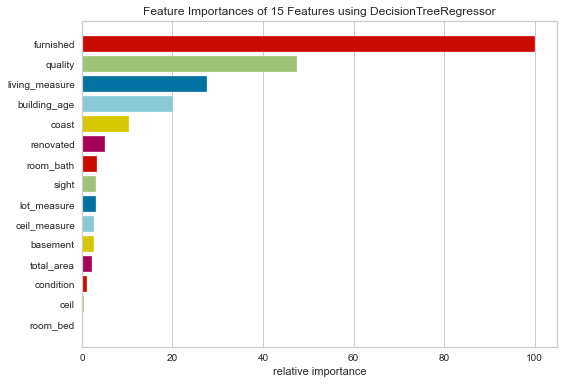

<AxesSubplot:title={'center':'Feature Importances of 15 Features using DecisionTreeRegressor'}, xlabel='relative importance'>

In [196]:
viz = FeatureImportances(dt_model)
viz.fit(X, y)
viz.show()

### KNN 

In [197]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [198]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_Scaled = ss.fit_transform(X_train)
X_test_Scaled = ss.transform(X_test)

In [199]:
%%time

# creating odd list of K for KNN
neighbors = list(range(1,50,2))
# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train_Scaled, y_train, cv=10, scoring='neg_mean_absolute_error')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)


The optimal number of neighbors is 17.
CPU times: total: 2min 43s
Wall time: 2min 46s


In [200]:
knn_model = KNeighborsRegressor(n_neighbors = optimal_k)
knn_model.fit(X_train_Scaled, y_train)

KNeighborsRegressor(n_neighbors=17)

In [201]:
## Predict Train results
y_train_pred = knn_model.predict(X_train_Scaled)

## Predict Test results
y_pred = knn_model.predict(X_test_Scaled)

In [202]:
#entering metrics score to the metics dataframe
KNN_RMSE_Train = metrics.mean_squared_error(y_train.values, y_train_pred,squared=False) 
KNN_R2_Train = metrics.r2_score(y_train.values, y_train_pred) 
KNN_MAPE_Train = metrics.mean_absolute_percentage_error(y_train.values, y_train_pred) 

print("Train Results for KNN Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_train.values, y_train_pred))

Train Results for KNN Regression:
*******************************
Root mean squared error:  198060.3337587188
R-squared:  0.7115472430775125
Mean Absolute Percentage Error:  0.24745683595695694


In [203]:
model_results = pd.DataFrame([['KNN Train', KNN_RMSE_Train, KNN_R2_Train, KNN_MAPE_Train]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

results_train = results_train.append(model_results, ignore_index = True)
results_train

,Model,RMSE,Adjusted_r_2,MAPE
0,MultiLinear Reg Train,220898.614622,0.641189,0.294296
1,Random Forest Train,158637.678387,0.814949,0.217556
2,Decision Tree Train,167907.136997,0.792691,0.238919
3,KNN Train,198060.333759,0.711547,0.247457


In [204]:
#entering metrics score to the metics dataframe
KNN_RMSE_Test = metrics.mean_squared_error(y_test, y_pred,squared=False)
KNN_R2_Test = metrics.r2_score(y_test, y_pred) 
KNN_MAPE_Test = metrics.mean_absolute_percentage_error(y_test, y_pred) 


print("Test Results for KN Regression:")
print("*******************************")
print("Root mean squared err*or: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", rs(y_test, y_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_test, y_pred))

Test Results for KN Regression:
*******************************
Root mean squared err*or:  198286.6720498868
R-squared:  0.679679303921948
Mean Absolute Percentage Error:  0.26160926178265054


In [205]:
model_results = pd.DataFrame([['KNN Test', KNN_RMSE_Test, KNN_R2_Test, KNN_MAPE_Test]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

results_test = results_test.append(model_results, ignore_index = True)
print(results_test)

                  Model           RMSE  Adjusted_r_2      MAPE
0  MultiLinear Reg Test  209334.253641      0.642992  0.296004
1    Random Forest Test  187555.850083      0.713411  0.251342
2    Decision Tree Test  217619.634492      0.614172  0.268072
3              KNN Test  198286.672050      0.679679  0.261609


In [206]:
knn = KNeighborsRegressor()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='neg_mean_absolute_error', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train_Scaled, y_train)

print(grid_search.best_params_)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
{'n_neighbors': 16}


### LASSO Regression

In [207]:
from sklearn.linear_model import Lasso

In [208]:
#created a Lasso Regression model
las_model=Lasso(alpha=0.1)
las_model.fit(X_train,y_train)

Lasso(alpha=0.1)

In [209]:
y_pred = las_model.predict(X_test)
print('Performance on training data using Lasso Regression:',las_model.score(X_train,y_train))
print('Performance on testing data using Lasso Regression:',las_model.score(X_test,y_test))
acc_las=metrics.r2_score(y_test, y_pred)
print('Accuracy las: ',acc_las)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))

Performance on training data using Lasso Regression: 0.6411872004877283
Performance on testing data using Lasso Regression: 0.6430076303741846
Accuracy las:  0.6430076303741846
MSE:  43818850618.85609
MAE: 138405.28513646437


In [210]:
%%time
tuned_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
Lassso_model = RandomizedSearchCV(Lasso(), tuned_params, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)
Lassso_model.fit(X_train, y_train)

CPU times: total: 1.45 s
Wall time: 15.9 s


RandomizedSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
                   param_distributions={'alpha': [0.0001, 0.001, 0.01, 0.1, 1,
                                                  10, 100, 1000]},
                   scoring='neg_mean_absolute_error')

In [211]:
Lassso_model.best_estimator_

Lasso(alpha=100)

In [212]:
## Predict Train results
y_train_pred = Lassso_model.predict(X_train)

## Predict Test results
y_pred = Lassso_model.predict(X_test)

In [213]:
#entering metrics score to the metics dataframe
Lasso_RMSE_Train = metrics.mean_squared_error(y_train.values, y_train_pred,squared=False) 
Lasso_R2_Train = metrics.r2_score(y_train.values, y_train_pred) 
Lasso_MAPE_Train = metrics.mean_absolute_percentage_error(y_train.values, y_train_pred) 


print("Train Results for Lasso Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_train.values, y_train_pred))

Train Results for Lasso Regression:
*******************************
Root mean squared error:  220903.77695877219
R-squared:  0.6411722979993497
Mean Absolute Percentage Error:  0.29430694241725297


In [214]:
model_results = pd.DataFrame([['Lasso Train', Lasso_RMSE_Train, Lasso_R2_Train, Lasso_MAPE_Train]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

results_train = results_train.append(model_results, ignore_index = True)
print(results_train)

                   Model           RMSE  Adjusted_r_2      MAPE
0  MultiLinear Reg Train  220898.614622      0.641189  0.294296
1    Random Forest Train  158637.678387      0.814949  0.217556
2    Decision Tree Train  167907.136997      0.792691  0.238919
3              KNN Train  198060.333759      0.711547  0.247457
4            Lasso Train  220903.776959      0.641172  0.294307


In [215]:
#entering metrics score to the metics dataframe
Lasso_RMSE_Test = metrics.mean_squared_error(y_test, y_pred,squared=False)
Lasso_R2_Test = metrics.r2_score(y_test, y_pred) 
Lasso_MAPE_Test = metrics.mean_absolute_percentage_error(y_test, y_pred) 


print("Test Results for Lasso Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", rs(y_test, y_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_test, y_pred))

Test Results for Lasso Regression:
*******************************
Root mean squared error:  209304.75094808987
R-squared:  0.6430921298771946
Mean Absolute Percentage Error:  0.2960433881836425


In [216]:
model_results = pd.DataFrame([['Lasso Test', Lasso_RMSE_Test, Lasso_R2_Test, Lasso_MAPE_Test]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

results_test = results_test.append(model_results, ignore_index = True)
print(results_test)

                  Model           RMSE  Adjusted_r_2      MAPE
0  MultiLinear Reg Test  209334.253641      0.642992  0.296004
1    Random Forest Test  187555.850083      0.713411  0.251342
2    Decision Tree Test  217619.634492      0.614172  0.268072
3              KNN Test  198286.672050      0.679679  0.261609
4            Lasso Test  209304.750948      0.643092  0.296043


### Ridge Regression

In [217]:
#created a Ridge regression model
from sklearn.linear_model import Ridge
rid_model=Ridge(alpha=0.1)
rid_model.fit(X_train,y_train)

Ridge(alpha=0.1)

In [218]:
y_pred = rid_model.predict(X_test)
print('Performance on training data using Ridge Regression:',rid_model.score(X_train,y_train))
print('Performance on testing data using Ridge Regression:',rid_model.score(X_test,y_test))
acc_rid=metrics.r2_score(y_test, y_pred)
print('Accuracy rid: ',acc_rid)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))

Performance on training data using Ridge Regression: 0.6411871811989441
Performance on testing data using Ridge Regression: 0.6430106216948634
Accuracy rid:  0.6430106216948634
MSE:  43818483450.68912
MAE: 138405.1477739579


In [219]:
tuned_paramss = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
Ridge_model = GridSearchCV(Ridge(), tuned_params, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)
Ridge_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='neg_mean_absolute_error')

In [220]:
Ridge_model.best_estimator_

Ridge(alpha=0.1)

In [221]:
## Predict Train results
y_train_pred = Ridge_model.predict(X_train)

## Predict Test results
y_pred = Ridge_model.predict(X_test)

In [222]:
#entering metrics score to the metics dataframe
Ridge_RMSE_Train = metrics.mean_squared_error(y_train.values, y_train_pred,squared=False) 
Ridge_R2_Train = metrics.r2_score(y_train.values, y_train_pred) 
Ridge_MAPE_Train = metrics.mean_absolute_percentage_error(y_train.values, y_train_pred) 


print("Train Results for Ridge Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_train.values, y_train_pred))

Train Results for Ridge Regression:
*******************************
Root mean squared error:  220899.19566658407
R-squared:  0.6411871811989441
Mean Absolute Percentage Error:  0.29429322714302325


In [223]:
model_results = pd.DataFrame([['Ridge Train', Ridge_RMSE_Train, Ridge_R2_Train, Ridge_MAPE_Train]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

results_train = results_train.append(model_results, ignore_index = True)
print(results_train)

                   Model           RMSE  Adjusted_r_2      MAPE
0  MultiLinear Reg Train  220898.614622      0.641189  0.294296
1    Random Forest Train  158637.678387      0.814949  0.217556
2    Decision Tree Train  167907.136997      0.792691  0.238919
3              KNN Train  198060.333759      0.711547  0.247457
4            Lasso Train  220903.776959      0.641172  0.294307
5            Ridge Train  220899.195667      0.641187  0.294293


In [224]:
#entering metrics score to the metics dataframe
Ridge_RMSE_Test = metrics.mean_squared_error(y_test, y_pred,squared=False)
Ridge_R2_Test = metrics.r2_score(y_test, y_pred) 
Ridge_MAPE_Test = metrics.mean_absolute_percentage_error(y_test, y_pred) 


print("Test Results for Ridge Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_test, y_pred))


model_results = pd.DataFrame([['Ridge Test', Ridge_RMSE_Test, Ridge_R2_Test, Ridge_MAPE_Test]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

Test Results for Ridge Regression:
*******************************
Root mean squared error:  209328.6493786484
R-squared:  0.6430106216948634
Mean Absolute Percentage Error:  0.295991446204197


In [225]:
results_test = results_test.append(model_results, ignore_index = True)
print(results_test)

                  Model           RMSE  Adjusted_r_2      MAPE
0  MultiLinear Reg Test  209334.253641      0.642992  0.296004
1    Random Forest Test  187555.850083      0.713411  0.251342
2    Decision Tree Test  217619.634492      0.614172  0.268072
3              KNN Test  198286.672050      0.679679  0.261609
4            Lasso Test  209304.750948      0.643092  0.296043
5            Ridge Test  209328.649379      0.643011  0.295991


### XG Boost  

In [226]:
#Created a Gradient boosting model
XGB_model=XGBRegressor()
XGB_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [227]:
y_pred = XGB_model.predict(X_test)
print('Performance on training data using Gradient-boosting:',XGB_model.score(X_train,y_train))
print('Performance on testing data using Gradient-boosting:',XGB_model.score(X_test,y_test))
acc_XGB=metrics.r2_score(y_test, y_pred)
print('Accuracy XGB: ',acc_XGB)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))

Performance on training data using Gradient-boosting: 0.9039769525273839
Performance on testing data using Gradient-boosting: 0.7000117465953208
Accuracy XGB:  0.7000117465953208
MSE:  36821908762.72616
MAE: 122711.37997795215


In [228]:
%%time
tuned_params = {
    'max_depth': [ 9, 11, 13], 
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [800, 1000, 1100], 
    'reg_lambda': [0.001, 0.1, 1.0],
    'min_child_weight' : [2, 3, 4],
}

xgb_model = RandomizedSearchCV(XGBRegressor(), tuned_params, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)

xgb_model.fit(X_train, y_train)

CPU times: total: 2min 44s
Wall time: 23min 41s


RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints...
                                          predictor=None, random_state=None,
                                          reg_alpha=None, reg_lambda=None,
                                       

In [229]:
xgb_model.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=9, min_child_weight=4, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1.0, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [230]:
y_train_pred = xgb_model.predict(X_train)

y_pred = xgb_model.predict(X_test)

In [231]:
#entering metrics score to the metics dataframe
XGB_RMSE_Train = metrics.mean_squared_error(y_train.values, y_train_pred,squared=False) 
XGB_R2_Train = metrics.r2_score(y_train.values, y_train_pred) 
XGB_MAPE_Train = metrics.mean_absolute_percentage_error(y_train.values, y_train_pred) 

print("Train Results for XG Boost Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_train.values, y_train_pred))

Train Results for XG Boost Regression:
*******************************
Root mean squared error:  113650.08572976364
R-squared:  0.9050228318770157
Mean Absolute Percentage Error:  0.19337285465334056


In [232]:
model_results = pd.DataFrame([['XG Boost Train', XGB_RMSE_Train, XGB_R2_Train, XGB_MAPE_Train]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

results_train = results_train.append(model_results, ignore_index = True)
print(results_train)

                   Model           RMSE  Adjusted_r_2      MAPE
0  MultiLinear Reg Train  220898.614622      0.641189  0.294296
1    Random Forest Train  158637.678387      0.814949  0.217556
2    Decision Tree Train  167907.136997      0.792691  0.238919
3              KNN Train  198060.333759      0.711547  0.247457
4            Lasso Train  220903.776959      0.641172  0.294307
5            Ridge Train  220899.195667      0.641187  0.294293
6         XG Boost Train  113650.085730      0.905023  0.193373


In [233]:
#entering metrics score to the metics dataframe
XGB_RMSE_Test = metrics.mean_squared_error(y_test, y_pred,squared=False) 
XGB_R2_Test = metrics.r2_score(y_test, y_pred) 
XGB_MAPE_Test = metrics.mean_absolute_percentage_error(y_test, y_pred) 


print("Test Results for XG Boost Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_test, y_pred))

Test Results for XG Boost Regression:
*******************************
Root mean squared error:  182998.72451952053
R-squared:  0.7271687722323135
Mean Absolute Percentage Error:  0.2475308840515808


In [234]:
model_results = pd.DataFrame([['XG Boost Test', XGB_RMSE_Test, XGB_R2_Test, XGB_MAPE_Test]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

results_test = results_test.append(model_results, ignore_index = True)
print(results_test)

                  Model           RMSE  Adjusted_r_2      MAPE
0  MultiLinear Reg Test  209334.253641      0.642992  0.296004
1    Random Forest Test  187555.850083      0.713411  0.251342
2    Decision Tree Test  217619.634492      0.614172  0.268072
3              KNN Test  198286.672050      0.679679  0.261609
4            Lasso Test  209304.750948      0.643092  0.296043
5            Ridge Test  209328.649379      0.643011  0.295991
6         XG Boost Test  182998.724520      0.727169  0.247531


#### Feature Importance

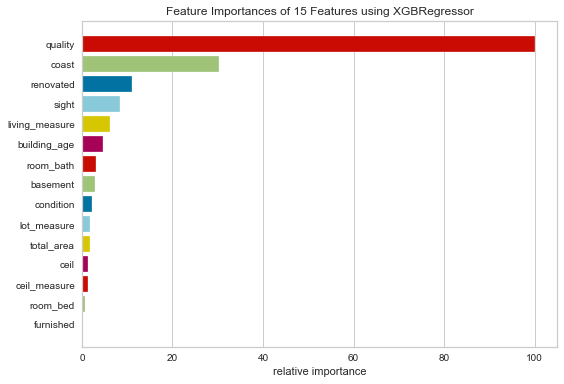

<AxesSubplot:title={'center':'Feature Importances of 15 Features using XGBRegressor'}, xlabel='relative importance'>

In [235]:
xgb_model = XGBRegressor(max_depth=9,learning_rate=0.01,n_estimators=1000, reg_lambda=1.0,random_state =0)
viz = FeatureImportances(xgb_model)
viz.fit(X, y)
viz.show()

In [236]:
pd.Series(xgb_model.feature_importances_,index=X_train.columns).sort_values(ascending=False)

quality           0.569745
coast             0.173087
renovated         0.063085
sight             0.048143
living_measure    0.035544
building_age      0.026452
room_bath         0.017122
basement          0.015936
condition         0.012369
lot_measure       0.010088
total_area        0.009639
ceil              0.007614
ceil_measure      0.007562
room_bed          0.003614
furnished         0.000000
dtype: float32

### ADA Boost

In [237]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

In [238]:
#Created an ada-boosting model
AD_model=AdaBoostRegressor()
AD_model.fit(X_train,y_train)

AdaBoostRegressor()

In [239]:
y_pred_ada = AD_model.predict(X_test)
print('Performance on training data using Ada-boosting:',AD_model.score(X_train,y_train))
print('Performance on testing data using Ada-boosting:',AD_model.score(X_test,y_test))
acc_AD=metrics.r2_score(y_test, y_pred_ada)
print('Accuracy AD: ',acc_AD)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred_ada))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred_ada))

Performance on training data using Ada-boosting: 0.09663984057099773
Performance on testing data using Ada-boosting: -0.047983258097798576
Accuracy AD:  -0.047983258097798576
MSE:  128634183094.1162
MAE: 308667.77320629766


#### Tuning 

In [240]:
parameters = {
    'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20],
    'loss': ['linear', 'square', 'exponential'],
    'learning_rate': [(0.97 + x / 100) for x in range(0, 8)],
}

clf = GridSearchCV(estimator=AD_model,param_grid=parameters,scoring='neg_mean_squared_error',n_jobs=1,cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=1,
             param_grid={'learning_rate': [0.97, 0.98, 0.99, 1.0, 1.01, 1.02,
                                           1.03, 1.04],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          20]},
             scoring='neg_mean_squared_error')

In [241]:
clf.best_params_

{'learning_rate': 1.03, 'loss': 'exponential', 'n_estimators': 8}

In [242]:
## Predict Train results
y_train_pred = clf.predict(X_train)

## Predict Test results
y_pred = clf.predict(X_test)

In [243]:
#entering metrics score to the metics dataframe
TUNED_AD_RMSE_Train = metrics.mean_squared_error(y_train.values, y_train_pred,squared=False) 
TUNED_AD_R2_Train = metrics.r2_score(y_train.values, y_train_pred) 
TUNED_AD_MAPE_Train = metrics.mean_absolute_percentage_error(y_train.values, y_train_pred) 


print("Train Results for ADA Boosting:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_train.values, y_train_pred))

Train Results for ADA Boosting:
*******************************
Root mean squared error:  235527.6663582083
R-squared:  0.5920907637530286
Mean Absolute Percentage Error:  0.38899991953765717


In [244]:
model_results = pd.DataFrame([['TUNED ADA Train', TUNED_AD_RMSE_Train, TUNED_AD_R2_Train, TUNED_AD_MAPE_Train]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

results_train = results_train.append(model_results, ignore_index = True)
print(results_train)

                   Model           RMSE  Adjusted_r_2      MAPE
0  MultiLinear Reg Train  220898.614622      0.641189  0.294296
1    Random Forest Train  158637.678387      0.814949  0.217556
2    Decision Tree Train  167907.136997      0.792691  0.238919
3              KNN Train  198060.333759      0.711547  0.247457
4            Lasso Train  220903.776959      0.641172  0.294307
5            Ridge Train  220899.195667      0.641187  0.294293
6         XG Boost Train  113650.085730      0.905023  0.193373
7        TUNED ADA Train  235527.666358      0.592091  0.389000


In [245]:
#entering metrics score to the metics dataframe
TUNED_AD_RMSE_Test = metrics.mean_squared_error(y_test, y_pred,squared=False)
TUNED_AD_R2_Test = metrics.r2_score(y_test, y_pred) 
TUNED_AD_MAPE_Test = metrics.mean_absolute_percentage_error(y_test, y_pred) 


print("Test Results for ADA Boosting:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", rs(y_test, y_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_test, y_pred))

Test Results for ADA Boosting:
*******************************
Root mean squared error:  240488.64567343332
R-squared:  0.5288197209087364
Mean Absolute Percentage Error:  0.3883574334470849


In [246]:
model_results = pd.DataFrame([['TUNED ADA Test', TUNED_AD_RMSE_Test, TUNED_AD_R2_Test, TUNED_AD_MAPE_Test]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

results_test = results_test.append(model_results, ignore_index = True)
print(results_test)

                  Model           RMSE  Adjusted_r_2      MAPE
0  MultiLinear Reg Test  209334.253641      0.642992  0.296004
1    Random Forest Test  187555.850083      0.713411  0.251342
2    Decision Tree Test  217619.634492      0.614172  0.268072
3              KNN Test  198286.672050      0.679679  0.261609
4            Lasso Test  209304.750948      0.643092  0.296043
5            Ridge Test  209328.649379      0.643011  0.295991
6         XG Boost Test  182998.724520      0.727169  0.247531
7        TUNED ADA Test  240488.645673      0.528820  0.388357


### Gradient Boost

In [248]:
#Created a Gradient boosting model
GB_model=GradientBoostingRegressor()
GB_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [249]:
y_pred = GB_model.predict(X_test)
print('Performance on training data using Gradient-boosting:',GB_model.score(X_train,y_train))
print('Performance on testing data using Gradient-boosting:',GB_model.score(X_test,y_test))
acc_GB=metrics.r2_score(y_test, y_pred)
print('Accuracy GB: ',acc_GB)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))

Performance on training data using Gradient-boosting: 0.7770282008497795
Performance on testing data using Gradient-boosting: 0.7174349956899093
Accuracy GB:  0.7174349956899093
MSE:  34683300729.811806
MAE: 122235.6662924664


In [250]:
#search best param for gradient boost
param_dist_gb = { "learning_rate": [0.15,0.1,0.05,0.01,0.005,0.001],
            
                 'n_estimators':[100,250,500,750],"max_depth":[9,10,11,12],
             
              "min_samples_leaf": [3,5,7,9]
                 }

gb_gridsearch = RandomizedSearchCV(GB_model,param_dist_gb, random_state=0)

In [251]:
search_gb=gb_gridsearch.fit(X_train, y_train)

search_gb.best_params_

{'n_estimators': 500,
 'min_samples_leaf': 7,
 'max_depth': 12,
 'learning_rate': 0.01}

In [252]:
#build gb mdel with best param
GB_model = GradientBoostingRegressor(learning_rate=0.01,
                                     max_depth=12,
                                     max_features='sqrt',
                                     min_samples_leaf=7,
                                     n_estimators=750)

In [253]:
GB_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=12, max_features='sqrt',
                          min_samples_leaf=7, n_estimators=750)

In [254]:
## Predict Train results
y_train_pred = GB_model.predict(X_train)

## Predict Test results
y_pred = GB_model.predict(X_test)

In [255]:
GB_RMSE_Train = metrics.mean_squared_error(y_train.values, y_train_pred,squared=False) 
GB_R2_Train = metrics.r2_score(y_train.values, y_train_pred) 
GB_MAPE_Train = metrics.mean_absolute_percentage_error(y_train.values, y_train_pred) 


print("Train Results for Gradient Boosting:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_train.values, y_train_pred))

Train Results for Gradient Boosting:
*******************************
Root mean squared error:  106876.66898691125
R-squared:  0.9160065344553723
Mean Absolute Percentage Error:  0.17570541897039912


In [256]:
model_results = pd.DataFrame([['GB Train', GB_RMSE_Train, GB_R2_Train, GB_MAPE_Train]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

results_train = results_train.append(model_results, ignore_index = True)
print(results_train)

                   Model           RMSE  Adjusted_r_2      MAPE
0  MultiLinear Reg Train  220898.614622      0.641189  0.294296
1    Random Forest Train  158637.678387      0.814949  0.217556
2    Decision Tree Train  167907.136997      0.792691  0.238919
3              KNN Train  198060.333759      0.711547  0.247457
4            Lasso Train  220903.776959      0.641172  0.294307
5            Ridge Train  220899.195667      0.641187  0.294293
6         XG Boost Train  113650.085730      0.905023  0.193373
7        TUNED ADA Train  235527.666358      0.592091  0.389000
8               GB Train  106876.668987      0.916007  0.175705


In [257]:
#entering metrics score to the metics dataframe
GB_RMSE_Test = metrics.mean_squared_error(y_test, y_pred,squared=False)
GB_R2_Test = metrics.r2_score(y_test, y_pred) 
GB_MAPE_Test = metrics.mean_absolute_percentage_error(y_test, y_pred) 


print("Test Results for Gradient Boosting")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_test, y_pred))

Test Results for Gradient Boosting
*******************************
Root mean squared error:  183746.40660304166
R-squared:  0.7249347922222503
Mean Absolute Percentage Error:  0.2458540290477997


In [258]:
model_results = pd.DataFrame([['GB Test', GB_RMSE_Test, GB_R2_Test, GB_MAPE_Test]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

results_test = results_test.append(model_results, ignore_index = True)
print(results_test)

                  Model           RMSE  Adjusted_r_2      MAPE
0  MultiLinear Reg Test  209334.253641      0.642992  0.296004
1    Random Forest Test  187555.850083      0.713411  0.251342
2    Decision Tree Test  217619.634492      0.614172  0.268072
3              KNN Test  198286.672050      0.679679  0.261609
4            Lasso Test  209304.750948      0.643092  0.296043
5            Ridge Test  209328.649379      0.643011  0.295991
6         XG Boost Test  182998.724520      0.727169  0.247531
7        TUNED ADA Test  240488.645673      0.528820  0.388357
8               GB Test  183746.406603      0.724935  0.245854


### Ensemble Method

In [259]:
## Ensembling Code
# Ensembling rf_model, xgb_model,dt_model - avoided KNN as that involves scaling 

from sklearn.ensemble import VotingRegressor
estim = [('RF',rf_model),('XG',xgb_model),('GB',GB_model)]
vot = VotingRegressor(estim,weights=[1,3,1])
vot.fit(X_train,y_train)
y_train_pred = vot.predict(X_train)
y_test_pred = vot.predict(X_test)

# After these predictions are done compute RMSE, Rsquared and MAPE as earlier

In [260]:
Ensembling_RMSE_Train = metrics.mean_squared_error(y_train.values, y_train_pred,squared=False) 
Ensembling_R2_Train = metrics.r2_score(y_train.values, y_train_pred) 
Ensembling_MAPE_Train = metrics.mean_absolute_percentage_error(y_train.values, y_train_pred) 


print("Train Results for Ensembling:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_train.values, y_train_pred))

Train Results for Ensembling:
*******************************
Root mean squared error:  110080.19809195922
R-squared:  0.9108958183628735
Mean Absolute Percentage Error:  0.18871024007661785


In [261]:
model_results = pd.DataFrame([['Ensembling Train', Ensembling_RMSE_Train, Ensembling_R2_Train, Ensembling_MAPE_Train]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

results_train = results_train.append(model_results, ignore_index = True)
print(results_train)

                   Model           RMSE  Adjusted_r_2      MAPE
0  MultiLinear Reg Train  220898.614622      0.641189  0.294296
1    Random Forest Train  158637.678387      0.814949  0.217556
2    Decision Tree Train  167907.136997      0.792691  0.238919
3              KNN Train  198060.333759      0.711547  0.247457
4            Lasso Train  220903.776959      0.641172  0.294307
5            Ridge Train  220899.195667      0.641187  0.294293
6         XG Boost Train  113650.085730      0.905023  0.193373
7        TUNED ADA Train  235527.666358      0.592091  0.389000
8               GB Train  106876.668987      0.916007  0.175705
9       Ensembling Train  110080.198092      0.910896  0.188710


In [262]:
#entering metrics score to the metics dataframe
Ensembling_RMSE_Test = metrics.mean_squared_error(y_test, y_test_pred,squared=False)
Ensembling_R2_Test = metrics.r2_score(y_test, y_test_pred) 
Ensembling_MAPE_Test = metrics.mean_absolute_percentage_error(y_test, y_test_pred) 


print("Test Results for :Ensembling")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_test, y_test_pred))


model_results = pd.DataFrame([['Ensembling Test', Ensembling_RMSE_Test, Ensembling_R2_Test, Ensembling_MAPE_Test]],
               columns = ['Model', 'RMSE', 'Adjusted_r_2', 'MAPE'])

Test Results for :Ensembling
*******************************
Root mean squared error:  183177.69392764493
R-squared:  0.7266348633742894
Mean Absolute Percentage Error:  0.24645881373920786


In [263]:
results_test = results_test.append(model_results, ignore_index = True)
print(results_test)

                  Model           RMSE  Adjusted_r_2      MAPE
0  MultiLinear Reg Test  209334.253641      0.642992  0.296004
1    Random Forest Test  187555.850083      0.713411  0.251342
2    Decision Tree Test  217619.634492      0.614172  0.268072
3              KNN Test  198286.672050      0.679679  0.261609
4            Lasso Test  209304.750948      0.643092  0.296043
5            Ridge Test  209328.649379      0.643011  0.295991
6         XG Boost Test  182998.724520      0.727169  0.247531
7        TUNED ADA Test  240488.645673      0.528820  0.388357
8               GB Test  183746.406603      0.724935  0.245854
9       Ensembling Test  183177.693928      0.726635  0.246459


### Final

In [264]:
pred_train=xgb_model.predict(X_train)
pred_test = xgb_model.predict(X_test)

(59754.978092023375, 8861186.413365655, 107869.91864161835, 8909301.353915248)

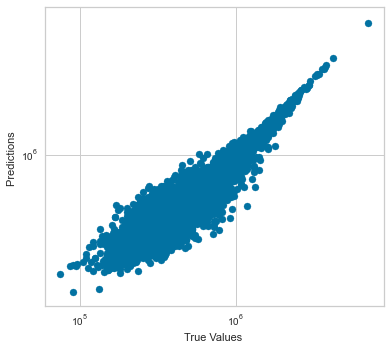

In [265]:
g=plt.scatter(y_test, pred_test)
g.axes.set_yscale('log')
g.axes.set_xscale('log')
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')
g.axes.axis('equal')
g.axes.axis('square')

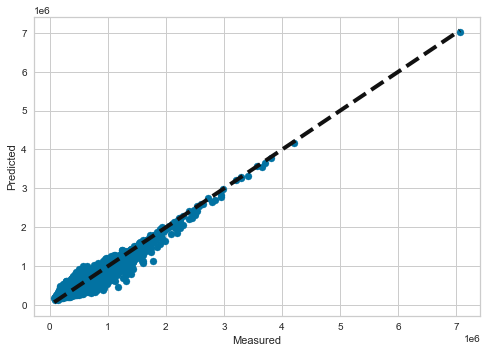

In [266]:
fig, ax = plt.subplots()
ax.scatter(y_test, pred_test)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show();

## Comparing RSME

In [270]:
index = ['Train_RMSE', 'Test_RMSE']
columns = [
    'LR','RF', 'DT', 'XGB', 'KNN', 'Lasso', 'Ridge', 'XGB', 'ADA','GB',
    'Ensembling',
]
train = [
    LR_RMSE_Train,RF_RMSE_Train, DT_RMSE_Train, XGB_RMSE_Train, KNN_RMSE_Train,
     Lasso_RMSE_Train, Ridge_RMSE_Train, XGB_RMSE_Train,
    TUNED_AD_RMSE_Train, GB_RMSE_Train ,Ensembling_RMSE_Train
]
test = [
    LR_RMSE_Test,RF_RMSE_Test, DT_RMSE_Test, XGB_RMSE_Test, KNN_RMSE_Test,
    Lasso_RMSE_Test, Ridge_RMSE_Test, XGB_RMSE_Test, TUNED_AD_RMSE_Test,GB_RMSE_Test,
    Ensembling_RMSE_Test
]

data = pd.DataFrame([train, test], index=index, columns=columns)
round(data, 3)

,LR,RF,DT,XGB,KNN,Lasso,Ridge,XGB,ADA,GB,Ensembling
Train_RMSE,220898.615,158637.678,167907.137,113650.086,198060.334,220903.777,220899.196,113650.086,235527.666,106876.669,110080.198
Test_RMSE,209334.254,187555.850,217619.634,182998.725,198286.672,209304.751,209328.649,182998.725,240488.646,183746.407,183177.694


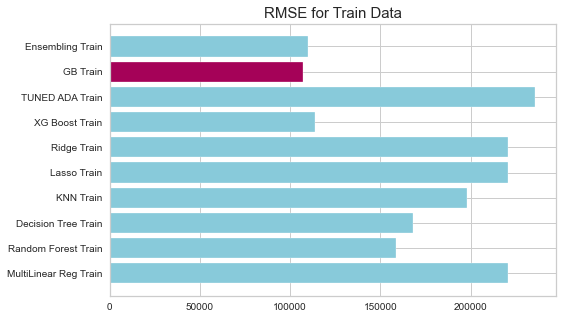

In [269]:
#plot a horizontal bar plot for the metrics of different regressor
plt.figure(figsize=(8,5))
min_RMSE_index= results_train.RMSE.argmin()
plt.barh(results_train.Model, results_train.RMSE, color='c')
plt.barh(results_train.Model[min_RMSE_index], results_train.RMSE[min_RMSE_index], color='m')
plt.title("RMSE for Train Data", size=15);
plt.show()

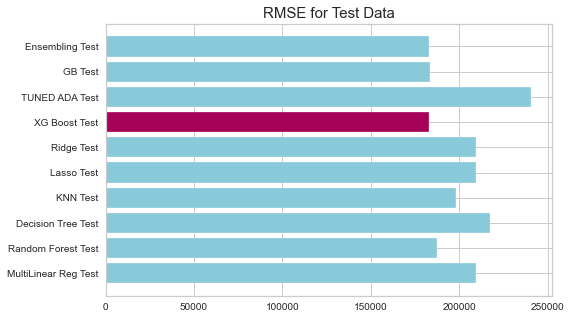

In [271]:
#plot a horizontal bar plot for the metrics of different regressor
plt.figure(figsize=(8,5))
min_RMSE_index= results_test.RMSE.argmin()
plt.barh(results_test.Model, results_test.RMSE, color='c')
plt.barh(results_test.Model[min_RMSE_index], results_test.RMSE[min_RMSE_index], color='m')
plt.title("RMSE for Test Data", size=15);
plt.show()

## Comparing Adjusted R_2

In [272]:
index = ['Train_Adjusted_R_Square', 'Test_Adjusted_R_Square']
columns = [
    'LR','RF', 'DT', 'XGB', 'KNN', 'Lasso', 'Ridge', 'XGB', 'ADA','GB',
    'Emsebling'
]
train = [
    LR_R2_Train,RF_R2_Train, DT_R2_Train, XGB_R2_Train, KNN_R2_Train,
    Lasso_R2_Train, Ridge_R2_Train, XGB_R2_Train, TUNED_AD_R2_Train, GB_R2_Train, Ensembling_R2_Train
]
test = [
    LR_R2_Test,RF_R2_Test, DT_R2_Test, XGB_R2_Test, KNN_R2_Test,
    Lasso_R2_Test, Ridge_R2_Test, XGB_R2_Test, TUNED_AD_R2_Test, GB_R2_Test,
    Ensembling_R2_Test
]

data = pd.DataFrame([train, test], index=index, columns=columns)
round(data, 3)

,LR,RF,DT,XGB,KNN,Lasso,Ridge,XGB,ADA,GB,Emsebling
Train_Adjusted_R_Square,0.641,0.815,0.793,0.905,0.712,0.641,0.641,0.905,0.592,0.916,0.911
Test_Adjusted_R_Square,0.643,0.713,0.614,0.727,0.680,0.643,0.643,0.727,0.529,0.725,0.727


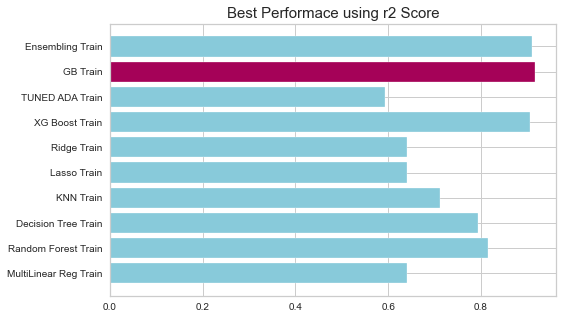

In [273]:
#plot a horizontal bar plot for the metrics of different regressor
plt.figure(figsize=(8,5))
max_Adjusted_r_2_index= results_train.Adjusted_r_2.argmax()
plt.barh(results_train.Model, results_train.Adjusted_r_2, color='c')
plt.barh(results_train.Model[max_Adjusted_r_2_index], results_train.Adjusted_r_2[max_Adjusted_r_2_index], color='m')
plt.title("Best Performace using r2 Score", size=15);
plt.show()

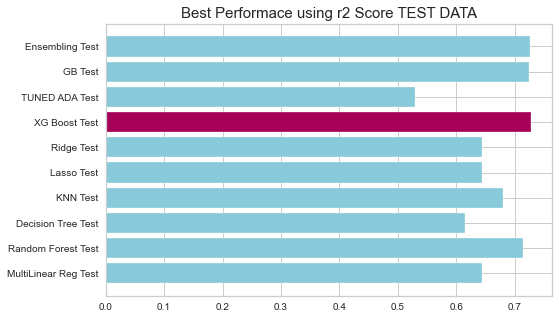

In [274]:
#plot a horizontal bar plot for the metrics of different regressor
plt.figure(figsize=(8,5))
max_Adjusted_r_2_index= results_test.Adjusted_r_2.argmax()
plt.barh(results_test.Model, results_test.Adjusted_r_2, color='c')
plt.barh(results_test.Model[max_Adjusted_r_2_index], results_test.Adjusted_r_2[max_Adjusted_r_2_index], color='m')
plt.title("Best Performace using r2 Score TEST DATA", size=15);
plt.show()

## Comparing MAPE

In [275]:
index = ['Train_MAPE', 'Test_MAPE']
columns = [
    'LR','RF', 'DT', 'XGB', 'KNN', 'Lasso', 'Ridge', 'ADA','GB', 'Ensembling'
]
train = [
   LR_MAPE_Train, RF_MAPE_Train, DT_MAPE_Train, XGB_MAPE_Train, KNN_MAPE_Train,
     Lasso_MAPE_Train, Ridge_MAPE_Train, TUNED_AD_MAPE_Train, GB_MAPE_Train,
    Ensembling_MAPE_Train
]
test = [
    LR_MAPE_Test, RF_MAPE_Test, DT_MAPE_Test, XGB_MAPE_Test, KNN_MAPE_Test,
    Lasso_MAPE_Test, Ridge_MAPE_Test, TUNED_AD_MAPE_Test, GB_MAPE_Test, Ensembling_MAPE_Test
]

data = pd.DataFrame([train, test], index=index, columns=columns)
round(data, 3)

,LR,RF,DT,XGB,KNN,Lasso,Ridge,ADA,GB,Ensembling
Train_MAPE,0.294,0.218,0.239,0.193,0.247,0.294,0.294,0.389,0.176,0.189
Test_MAPE,0.296,0.251,0.268,0.248,0.262,0.296,0.296,0.388,0.246,0.246


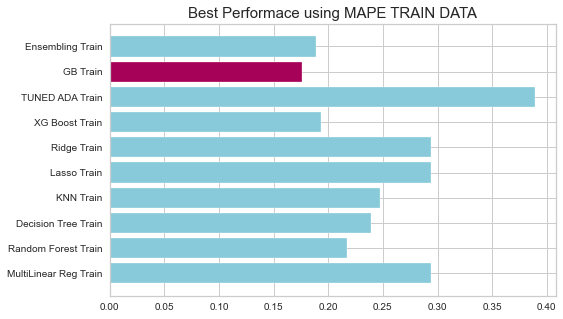

In [276]:
#plot a horizontal bar plot for the metrics of different regressor
plt.figure(figsize=(8,5))
min_MAPE_index= results_train.MAPE.argmin()
plt.barh(results_train.Model, results_train.MAPE, color='c')
plt.barh(results_train.Model[min_MAPE_index], results_train.MAPE[min_MAPE_index], color='m')
plt.title("Best Performace using MAPE TRAIN DATA", size=15);
plt.show()

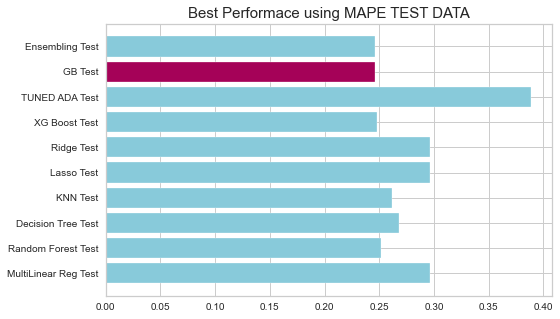

In [277]:
#plot a horizontal bar plot for the metrics of different regressor
plt.figure(figsize=(8,5))
min_MAPE_index= results_test.MAPE.argmin()
plt.barh(results_test.Model, results_test.MAPE, color='c')
plt.barh(results_test.Model[min_MAPE_index], results_test.MAPE[min_MAPE_index], color='m')
plt.title("Best Performace using MAPE TEST DATA", size=15);
plt.show()

## Final Comparison 

In [278]:
index = ['RMSE', 'Adjusted_R_Square', 'MAPE']
data = pd.DataFrame(
    {
        'MultiLinear Reg Train': [LR_RMSE_Train, LR_R2_Train, LR_MAPE_Train],
        'MultiLinear Reg Test': [LR_RMSE_Test, LR_R2_Test, LR_MAPE_Test],
        'Random Forest Train': [RF_RMSE_Train, RF_R2_Train, RF_MAPE_Train],
        'Random Forest Test': [RF_RMSE_Test, RF_R2_Test, RF_MAPE_Test],
        'Decision Tree Train': [DT_RMSE_Train, DT_R2_Train, DT_MAPE_Train],
        'Decision Tree Test': [DT_RMSE_Test, DT_R2_Test, DT_MAPE_Test],
        'XG Boost Train': [XGB_RMSE_Train, XGB_R2_Train, XGB_MAPE_Train],
        'XG Boost Test': [XGB_RMSE_Test, XGB_R2_Test, XGB_MAPE_Test],
        'KNN Train': [KNN_RMSE_Train, KNN_R2_Train, KNN_MAPE_Train],
        'KNN Test': [KNN_RMSE_Test, KNN_R2_Test, KNN_MAPE_Test],
        'Lasso Regression Train':
        [Lasso_RMSE_Train, Lasso_R2_Train, Lasso_MAPE_Train],
        'Lasso Regression Test':
        [Lasso_RMSE_Test, Lasso_R2_Test, Lasso_MAPE_Test],
        'Ridge Train': [Ridge_RMSE_Train, Ridge_R2_Train, Ridge_MAPE_Train],
        'Ridge Test': [Ridge_RMSE_Test, Ridge_R2_Test, Ridge_MAPE_Test],
        'ADA Boost Train':
        [TUNED_AD_RMSE_Train, TUNED_AD_R2_Train, TUNED_AD_MAPE_Train],
        'ADA Boost Test':
        [TUNED_AD_RMSE_Test, TUNED_AD_R2_Test, TUNED_AD_MAPE_Test],
        'GB Train':
        [GB_RMSE_Train, GB_R2_Train, GB_MAPE_Train],
        'GB Test':
        [GB_RMSE_Test , GB_R2_Test, GB_MAPE_Test],
        'Emsembling Train':
        [Ensembling_RMSE_Train, Ensembling_R2_Train, Ensembling_MAPE_Train],
        'Emsembling Test':
        [Ensembling_RMSE_Test, Ensembling_R2_Test, Ensembling_MAPE_Test],
        
    },
    index=index)
round(data, 2)

,MultiLinear Reg Train,MultiLinear Reg Test,Random Forest Train,Random Forest Test,Decision Tree Train,Decision Tree Test,XG Boost Train,XG Boost Test,KNN Train,KNN Test,Lasso Regression Train,Lasso Regression Test,Ridge Train,Ridge Test,ADA Boost Train,ADA Boost Test,GB Train,GB Test,Emsembling Train,Emsembling Test
RMSE,220898.61,209334.25,158637.68,187555.85,167907.14,217619.63,113650.09,182998.72,198060.33,198286.67,220903.78,209304.75,220899.20,209328.65,235527.67,240488.65,106876.67,183746.41,110080.20,183177.69
Adjusted_R_Square,0.64,0.64,0.81,0.71,0.79,0.61,0.91,0.73,0.71,0.68,0.64,0.64,0.64,0.64,0.59,0.53,0.92,0.72,0.91,0.73
MAPE,0.29,0.30,0.22,0.25,0.24,0.27,0.19,0.25,0.25,0.26,0.29,0.30,0.29,0.30,0.39,0.39,0.18,0.25,0.19,0.25
